In [1]:
#=======================================
## DNN - Diabetes
#=======================================

# Need compile Create_DNN_model.

#----------------------------------------
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#----------------------------------------
# Load the Diabetes dataset.

dataset = np.loadtxt("Diabetes-Data.txt")

print(type(dataset))

print(dataset.shape)

index = [1, 4, 5]

X = dataset[:, index]
Y = dataset[:, 8]

print(np.unique(Y))

print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
(768, 9)
[0. 1.]
(768, 3)
(768,)


In [3]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

print(np.round(np.mean(X_train, axis = 0), 4))
print(np.round(np.std(X_train, axis = 0, ddof = 1), 4))

Y_train = Y


[120.8945  79.7995  31.9926]
[ 31.9726 115.244    7.8842]
[-0. -0.  0.]
[1. 1. 1.]


In [4]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)

In [5]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model


In [6]:
#----------------------------------------
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 4, 6, 6, 4, 1]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.2, 0.2, 0.2, 0.2]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'relu', 'relu', 'sigmoid']

In [7]:
#----------------------------------------
# 10-fold cross validation

cv_bc = []
cv_acc = []

for k in range(fold_num):
    # Build the model.
    model = create_DNN_model(nodes, drop, kernel, act)
    # Compile the model.
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 40, verbose = 1)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 1)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_bc.append(scores[0])
    cv_acc.append(scores[1])


Train on 552 samples, validate on 139 samples
Epoch 1/1000
552/552 [==============================] - 2s 3ms/step - loss: 0.6920 - acc: 0.6594 - val_loss: 0.6908 - val_acc: 0.6475
Epoch 2/1000
552/552 [==============================] - 0s 105us/step - loss: 0.6894 - acc: 0.6594 - val_loss: 0.6883 - val_acc: 0.6475
Epoch 3/1000
552/552 [==============================] - 0s 109us/step - loss: 0.6867 - acc: 0.6594 - val_loss: 0.6855 - val_acc: 0.6475
Epoch 4/1000
552/552 [==============================] - 0s 92us/step - loss: 0.6836 - acc: 0.6594 - val_loss: 0.6827 - val_acc: 0.6475
Epoch 5/1000
552/552 [==============================] - 0s 133us/step - loss: 0.6802 - acc: 0.6594 - val_loss: 0.6793 - val_acc: 0.6475
Epoch 6/1000
552/552 [==============================] - 0s 112us/step - loss: 0.6763 - acc: 0.6594 - val_loss: 0.6755 - val_acc: 0.6475
Epoch 7/1000
552/552 [==============================] - 0s 107us/step - loss: 0.6717 - acc: 0.6594 - val_loss: 0.6715 - val_acc: 0.6475
Epoch

552/552 [==============================] - 0s 133us/step - loss: 0.5545 - acc: 0.7591 - val_loss: 0.5576 - val_acc: 0.7194
Epoch 61/1000
552/552 [==============================] - 0s 109us/step - loss: 0.5592 - acc: 0.7482 - val_loss: 0.5580 - val_acc: 0.7266
Epoch 62/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5705 - acc: 0.7246 - val_loss: 0.5576 - val_acc: 0.7266
Epoch 63/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5626 - acc: 0.7264 - val_loss: 0.5568 - val_acc: 0.7266
Epoch 64/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5642 - acc: 0.7319 - val_loss: 0.5562 - val_acc: 0.7194
Epoch 65/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5639 - acc: 0.7337 - val_loss: 0.5560 - val_acc: 0.7194
Epoch 66/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5880 - acc: 0.7355 - val_loss: 0.5569 - val_acc: 0.7266
Epoch 67/1000
552/552 [==============================] -

552/552 [==============================] - 0s 122us/step - loss: 0.5665 - acc: 0.7283 - val_loss: 0.5492 - val_acc: 0.7338
Epoch 120/1000
552/552 [==============================] - 0s 124us/step - loss: 0.5751 - acc: 0.7319 - val_loss: 0.5489 - val_acc: 0.7338
Epoch 121/1000
552/552 [==============================] - 0s 109us/step - loss: 0.5450 - acc: 0.7536 - val_loss: 0.5490 - val_acc: 0.7338
Epoch 122/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5668 - acc: 0.7355 - val_loss: 0.5493 - val_acc: 0.7338
Epoch 123/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5532 - acc: 0.7428 - val_loss: 0.5492 - val_acc: 0.7338
Epoch 124/1000
552/552 [==============================] - 0s 102us/step - loss: 0.5614 - acc: 0.7464 - val_loss: 0.5489 - val_acc: 0.7338
Epoch 125/1000
552/552 [==============================] - 0s 87us/step - loss: 0.5525 - acc: 0.7627 - val_loss: 0.5484 - val_acc: 0.7338
Epoch 126/1000
552/552 [==========================

552/552 [==============================] - 0s 115us/step - loss: 0.5436 - acc: 0.7446 - val_loss: 0.5435 - val_acc: 0.7338
Epoch 179/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5549 - acc: 0.7301 - val_loss: 0.5434 - val_acc: 0.7266
Epoch 180/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5471 - acc: 0.7264 - val_loss: 0.5430 - val_acc: 0.7338
Epoch 181/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5500 - acc: 0.7409 - val_loss: 0.5425 - val_acc: 0.7338
Epoch 182/1000
552/552 [==============================] - 0s 163us/step - loss: 0.5663 - acc: 0.7572 - val_loss: 0.5429 - val_acc: 0.7338
Epoch 183/1000
552/552 [==============================] - ETA: 0s - loss: 0.5173 - acc: 0.766 - 0s 190us/step - loss: 0.5367 - acc: 0.7409 - val_loss: 0.5436 - val_acc: 0.7338
Epoch 184/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5514 - acc: 0.7409 - val_loss: 0.5435 - val_acc: 0.7338
Epoch 185/1

552/552 [==============================] - 0s 129us/step - loss: 0.5420 - acc: 0.7355 - val_loss: 0.5348 - val_acc: 0.7338
Epoch 238/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5561 - acc: 0.7246 - val_loss: 0.5351 - val_acc: 0.7338
Epoch 239/1000
552/552 [==============================] - 0s 97us/step - loss: 0.5452 - acc: 0.7482 - val_loss: 0.5348 - val_acc: 0.7338
Epoch 240/1000
552/552 [==============================] - 0s 110us/step - loss: 0.5487 - acc: 0.7428 - val_loss: 0.5351 - val_acc: 0.7338
Epoch 241/1000
552/552 [==============================] - 0s 102us/step - loss: 0.5520 - acc: 0.7446 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 242/1000
552/552 [==============================] - 0s 90us/step - loss: 0.5696 - acc: 0.7156 - val_loss: 0.5346 - val_acc: 0.7338
Epoch 243/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5426 - acc: 0.7409 - val_loss: 0.5344 - val_acc: 0.7338
Epoch 244/1000
552/552 [===========================

552/552 [==============================] - 0s 92us/step - loss: 0.5674 - acc: 0.7409 - val_loss: 0.5290 - val_acc: 0.7266
Epoch 297/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5441 - acc: 0.7663 - val_loss: 0.5299 - val_acc: 0.7266
Epoch 298/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5548 - acc: 0.7391 - val_loss: 0.5299 - val_acc: 0.7266
Epoch 299/1000
552/552 [==============================] - 0s 102us/step - loss: 0.5538 - acc: 0.7428 - val_loss: 0.5304 - val_acc: 0.7266
Epoch 300/1000
552/552 [==============================] - 0s 75us/step - loss: 0.5492 - acc: 0.7428 - val_loss: 0.5305 - val_acc: 0.7266
Epoch 301/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5377 - acc: 0.7409 - val_loss: 0.5303 - val_acc: 0.7266
Epoch 302/1000
552/552 [==============================] - 0s 102us/step - loss: 0.5493 - acc: 0.7391 - val_loss: 0.5300 - val_acc: 0.7266
Epoch 303/1000
552/552 [===========================

552/552 [==============================] - 0s 108us/step - loss: 0.5172 - acc: 0.7754 - val_loss: 0.5274 - val_acc: 0.7122
Epoch 356/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5497 - acc: 0.7518 - val_loss: 0.5276 - val_acc: 0.7122
Epoch 357/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5527 - acc: 0.7409 - val_loss: 0.5273 - val_acc: 0.7122
Epoch 358/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5509 - acc: 0.7591 - val_loss: 0.5278 - val_acc: 0.7122
Epoch 359/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5252 - acc: 0.7772 - val_loss: 0.5283 - val_acc: 0.7122
Epoch 360/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5424 - acc: 0.7355 - val_loss: 0.5280 - val_acc: 0.7122
Epoch 361/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5337 - acc: 0.7609 - val_loss: 0.5279 - val_acc: 0.7122
Epoch 362/1000
552/552 [=========================

552/552 [==============================] - 0s 115us/step - loss: 0.5331 - acc: 0.7246 - val_loss: 0.5275 - val_acc: 0.7194
Epoch 415/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5271 - acc: 0.7536 - val_loss: 0.5279 - val_acc: 0.7194
Epoch 416/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5321 - acc: 0.7264 - val_loss: 0.5280 - val_acc: 0.7194
Epoch 417/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5644 - acc: 0.7428 - val_loss: 0.5276 - val_acc: 0.7194
Epoch 418/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5638 - acc: 0.7355 - val_loss: 0.5281 - val_acc: 0.7194
Epoch 419/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5387 - acc: 0.7518 - val_loss: 0.5297 - val_acc: 0.7194
Epoch 420/1000
552/552 [==============================] - 0s 105us/step - loss: 0.5525 - acc: 0.7482 - val_loss: 0.5297 - val_acc: 0.7194
Epoch 421/1000
552/552 [=========================

552/552 [==============================] - 0s 109us/step - loss: 0.5355 - acc: 0.7591 - val_loss: 0.5294 - val_acc: 0.7122
Epoch 474/1000
552/552 [==============================] - 0s 152us/step - loss: 0.5260 - acc: 0.7464 - val_loss: 0.5297 - val_acc: 0.7122
Epoch 475/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5339 - acc: 0.7355 - val_loss: 0.5292 - val_acc: 0.7122
Epoch 476/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5320 - acc: 0.7572 - val_loss: 0.5293 - val_acc: 0.7194
Epoch 477/1000
552/552 [==============================] - 0s 97us/step - loss: 0.5249 - acc: 0.7717 - val_loss: 0.5294 - val_acc: 0.7194
Epoch 478/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5560 - acc: 0.7482 - val_loss: 0.5300 - val_acc: 0.7194
Epoch 479/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5298 - acc: 0.7591 - val_loss: 0.5310 - val_acc: 0.7194
Epoch 480/1000
552/552 [==========================

552/552 [==============================] - 0s 120us/step - loss: 0.5301 - acc: 0.7373 - val_loss: 0.5272 - val_acc: 0.7122
Epoch 533/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5370 - acc: 0.7500 - val_loss: 0.5268 - val_acc: 0.7122
Epoch 534/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5557 - acc: 0.7391 - val_loss: 0.5275 - val_acc: 0.7194
Epoch 535/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5344 - acc: 0.7518 - val_loss: 0.5285 - val_acc: 0.7194
Epoch 536/1000
552/552 [==============================] - 0s 87us/step - loss: 0.5310 - acc: 0.7645 - val_loss: 0.5291 - val_acc: 0.7194
Epoch 537/1000
552/552 [==============================] - 0s 74us/step - loss: 0.5141 - acc: 0.7736 - val_loss: 0.5293 - val_acc: 0.7194
Epoch 538/1000
552/552 [==============================] - 0s 89us/step - loss: 0.5215 - acc: 0.7500 - val_loss: 0.5285 - val_acc: 0.7194
Epoch 539/1000
552/552 [=============================

Epoch 592/1000
552/552 [==============================] - 0s 83us/step - loss: 0.5264 - acc: 0.7572 - val_loss: 0.5257 - val_acc: 0.7338
Epoch 593/1000
552/552 [==============================] - 0s 88us/step - loss: 0.5313 - acc: 0.7446 - val_loss: 0.5257 - val_acc: 0.7338
Epoch 594/1000
552/552 [==============================] - 0s 112us/step - loss: 0.5485 - acc: 0.7246 - val_loss: 0.5264 - val_acc: 0.7338
Epoch 595/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5245 - acc: 0.7518 - val_loss: 0.5268 - val_acc: 0.7338
Epoch 596/1000
552/552 [==============================] - 0s 96us/step - loss: 0.5475 - acc: 0.7264 - val_loss: 0.5268 - val_acc: 0.7338
Epoch 597/1000
552/552 [==============================] - 0s 93us/step - loss: 0.5522 - acc: 0.7373 - val_loss: 0.5279 - val_acc: 0.7338
Epoch 598/1000
552/552 [==============================] - 0s 93us/step - loss: 0.5217 - acc: 0.7609 - val_loss: 0.5281 - val_acc: 0.7266
Epoch 599/1000
552/552 [===============

Epoch 652/1000
552/552 [==============================] - 0s 101us/step - loss: 0.5307 - acc: 0.7518 - val_loss: 0.5343 - val_acc: 0.7050
Epoch 653/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5321 - acc: 0.7428 - val_loss: 0.5334 - val_acc: 0.7122
Epoch 654/1000
552/552 [==============================] - 0s 95us/step - loss: 0.5311 - acc: 0.7609 - val_loss: 0.5333 - val_acc: 0.7122
Epoch 655/1000
552/552 [==============================] - 0s 91us/step - loss: 0.5191 - acc: 0.7663 - val_loss: 0.5313 - val_acc: 0.7122
Epoch 656/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5581 - acc: 0.7591 - val_loss: 0.5306 - val_acc: 0.7122
Epoch 657/1000
552/552 [==============================] - 0s 72us/step - loss: 0.5323 - acc: 0.7464 - val_loss: 0.5317 - val_acc: 0.7266
Epoch 658/1000
552/552 [==============================] - 0s 94us/step - loss: 0.5429 - acc: 0.7518 - val_loss: 0.5313 - val_acc: 0.7266
Epoch 659/1000
552/552 [================

Epoch 712/1000
552/552 [==============================] - 0s 101us/step - loss: 0.5431 - acc: 0.7500 - val_loss: 0.5325 - val_acc: 0.7266
Epoch 713/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5424 - acc: 0.7337 - val_loss: 0.5321 - val_acc: 0.7266
Epoch 714/1000
552/552 [==============================] - 0s 102us/step - loss: 0.5233 - acc: 0.7681 - val_loss: 0.5324 - val_acc: 0.7266
Epoch 715/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5132 - acc: 0.7500 - val_loss: 0.5306 - val_acc: 0.7266
Epoch 716/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5313 - acc: 0.7464 - val_loss: 0.5294 - val_acc: 0.7266
Epoch 717/1000
552/552 [==============================] - 0s 96us/step - loss: 0.5369 - acc: 0.7391 - val_loss: 0.5293 - val_acc: 0.7266
Epoch 718/1000
552/552 [==============================] - 0s 97us/step - loss: 0.5129 - acc: 0.7754 - val_loss: 0.5295 - val_acc: 0.7266
Epoch 719/1000
552/552 [=============

Epoch 772/1000
552/552 [==============================] - 0s 91us/step - loss: 0.5258 - acc: 0.7536 - val_loss: 0.5341 - val_acc: 0.7194
Epoch 773/1000
552/552 [==============================] - 0s 94us/step - loss: 0.5313 - acc: 0.7536 - val_loss: 0.5337 - val_acc: 0.7194
Epoch 774/1000
552/552 [==============================] - 0s 84us/step - loss: 0.5290 - acc: 0.7464 - val_loss: 0.5347 - val_acc: 0.6978
Epoch 775/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5288 - acc: 0.7518 - val_loss: 0.5358 - val_acc: 0.6978
Epoch 776/1000
552/552 [==============================] - 0s 94us/step - loss: 0.5270 - acc: 0.7536 - val_loss: 0.5359 - val_acc: 0.6978
Epoch 777/1000
552/552 [==============================] - 0s 104us/step - loss: 0.5298 - acc: 0.7536 - val_loss: 0.5344 - val_acc: 0.7122
Epoch 778/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5292 - acc: 0.7428 - val_loss: 0.5320 - val_acc: 0.7194
Epoch 779/1000
552/552 [================

552/552 [==============================] - 0s 142us/step - loss: 0.5184 - acc: 0.7681 - val_loss: 0.5368 - val_acc: 0.7122
Epoch 832/1000
552/552 [==============================] - 0s 164us/step - loss: 0.5241 - acc: 0.7518 - val_loss: 0.5359 - val_acc: 0.7194
Epoch 833/1000
552/552 [==============================] - 0s 145us/step - loss: 0.5265 - acc: 0.7536 - val_loss: 0.5354 - val_acc: 0.7194
Epoch 834/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5476 - acc: 0.7518 - val_loss: 0.5347 - val_acc: 0.7194
Epoch 835/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5029 - acc: 0.7736 - val_loss: 0.5336 - val_acc: 0.7194
Epoch 836/1000
552/552 [==============================] - 0s 156us/step - loss: 0.5319 - acc: 0.7663 - val_loss: 0.5325 - val_acc: 0.7194
Epoch 837/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5420 - acc: 0.7518 - val_loss: 0.5344 - val_acc: 0.7194
Epoch 838/1000
552/552 [=========================

552/552 [==============================] - 0s 138us/step - loss: 0.5267 - acc: 0.7518 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 891/1000
552/552 [==============================] - 0s 159us/step - loss: 0.5309 - acc: 0.7591 - val_loss: 0.5353 - val_acc: 0.7122
Epoch 892/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5369 - acc: 0.7572 - val_loss: 0.5349 - val_acc: 0.7122
Epoch 893/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5209 - acc: 0.7717 - val_loss: 0.5347 - val_acc: 0.6978
Epoch 894/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5133 - acc: 0.7681 - val_loss: 0.5346 - val_acc: 0.6978
Epoch 895/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5329 - acc: 0.7536 - val_loss: 0.5361 - val_acc: 0.6978
Epoch 896/1000
552/552 [==============================] - 0s 161us/step - loss: 0.5330 - acc: 0.7554 - val_loss: 0.5366 - val_acc: 0.6978
Epoch 897/1000
552/552 [=========================

552/552 [==============================] - 0s 156us/step - loss: 0.5000 - acc: 0.7645 - val_loss: 0.5341 - val_acc: 0.6978
Epoch 950/1000
552/552 [==============================] - 0s 140us/step - loss: 0.5423 - acc: 0.7428 - val_loss: 0.5339 - val_acc: 0.6978
Epoch 951/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5464 - acc: 0.7518 - val_loss: 0.5328 - val_acc: 0.6978
Epoch 952/1000
552/552 [==============================] - 0s 140us/step - loss: 0.5143 - acc: 0.7699 - val_loss: 0.5327 - val_acc: 0.6978
Epoch 953/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5546 - acc: 0.7409 - val_loss: 0.5316 - val_acc: 0.7050
Epoch 954/1000
552/552 [==============================] - 0s 155us/step - loss: 0.5278 - acc: 0.7554 - val_loss: 0.5326 - val_acc: 0.7194
Epoch 955/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5220 - acc: 0.7554 - val_loss: 0.5326 - val_acc: 0.7266
Epoch 956/1000
552/552 [=========================

552/552 [==============================] - 0s 92us/step - loss: 0.6812 - acc: 0.6576 - val_loss: 0.6812 - val_acc: 0.6475
Epoch 8/1000
552/552 [==============================] - 0s 91us/step - loss: 0.6796 - acc: 0.6576 - val_loss: 0.6797 - val_acc: 0.6475
Epoch 9/1000
552/552 [==============================] - 0s 110us/step - loss: 0.6780 - acc: 0.6576 - val_loss: 0.6783 - val_acc: 0.6475
Epoch 10/1000
552/552 [==============================] - 0s 93us/step - loss: 0.6765 - acc: 0.6576 - val_loss: 0.6770 - val_acc: 0.6475
Epoch 11/1000
552/552 [==============================] - 0s 97us/step - loss: 0.6751 - acc: 0.6576 - val_loss: 0.6756 - val_acc: 0.6475
Epoch 12/1000
552/552 [==============================] - 0s 104us/step - loss: 0.6737 - acc: 0.6576 - val_loss: 0.6744 - val_acc: 0.6475
Epoch 13/1000
552/552 [==============================] - 0s 112us/step - loss: 0.6724 - acc: 0.6576 - val_loss: 0.6732 - val_acc: 0.6475
Epoch 14/1000
552/552 [==============================] - 0s 1

552/552 [==============================] - 0s 118us/step - loss: 0.6443 - acc: 0.6576 - val_loss: 0.6497 - val_acc: 0.6475
Epoch 68/1000
552/552 [==============================] - 0s 121us/step - loss: 0.6442 - acc: 0.6576 - val_loss: 0.6496 - val_acc: 0.6475
Epoch 69/1000
552/552 [==============================] - 0s 83us/step - loss: 0.6441 - acc: 0.6576 - val_loss: 0.6495 - val_acc: 0.6475
Epoch 70/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6440 - acc: 0.6576 - val_loss: 0.6495 - val_acc: 0.6475
Epoch 71/1000
552/552 [==============================] - 0s 101us/step - loss: 0.6439 - acc: 0.6576 - val_loss: 0.6494 - val_acc: 0.6475
Epoch 72/1000
552/552 [==============================] - 0s 118us/step - loss: 0.6438 - acc: 0.6576 - val_loss: 0.6494 - val_acc: 0.6475
Epoch 73/1000
552/552 [==============================] - 0s 77us/step - loss: 0.6438 - acc: 0.6576 - val_loss: 0.6493 - val_acc: 0.6475
Epoch 74/1000
552/552 [==============================] - 

Epoch 127/1000
552/552 [==============================] - 0s 128us/step - loss: 0.6427 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 128/1000
552/552 [==============================] - 0s 105us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 129/1000
552/552 [==============================] - 0s 142us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 130/1000
552/552 [==============================] - 0s 128us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 131/1000
552/552 [==============================] - 0s 164us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 132/1000
552/552 [==============================] - 0s 158us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 133/1000
552/552 [==============================] - 0s 154us/step - loss: 0.6427 - acc: 0.6576 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 134/1000
552/552 [==========

552/552 [==============================] - 0s 108us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 187/1000
552/552 [==============================] - 0s 94us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 188/1000
552/552 [==============================] - 0s 87us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 189/1000
552/552 [==============================] - 0s 148us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 190/1000
552/552 [==============================] - 0s 114us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 191/1000
552/552 [==============================] - 0s 112us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 192/1000
552/552 [==============================] - 0s 100us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 193/1000
552/552 [===========================

552/552 [==============================] - 0s 99us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 246/1000
552/552 [==============================] - 0s 86us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 247/1000
552/552 [==============================] - 0s 117us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 248/1000
552/552 [==============================] - 0s 103us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 249/1000
552/552 [==============================] - 0s 134us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 250/1000
552/552 [==============================] - 0s 122us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 251/1000
552/552 [==============================] - 0s 118us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 252/1000
552/552 [===========================

552/552 [==============================] - 0s 117us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 305/1000
552/552 [==============================] - 0s 110us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 306/1000
552/552 [==============================] - 0s 116us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 307/1000
552/552 [==============================] - 0s 142us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 308/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 309/1000
552/552 [==============================] - 0s 122us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 310/1000
552/552 [==============================] - 0s 110us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 311/1000
552/552 [=========================

552/552 [==============================] - 0s 113us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 364/1000
552/552 [==============================] - 0s 142us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 365/1000
552/552 [==============================] - 0s 103us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 366/1000
552/552 [==============================] - 0s 84us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 367/1000
552/552 [==============================] - 0s 109us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 368/1000
552/552 [==============================] - 0s 126us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 369/1000
552/552 [==============================] - 0s 106us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 370/1000
552/552 [==========================

552/552 [==============================] - 0s 122us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 423/1000
552/552 [==============================] - 0s 89us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 424/1000
552/552 [==============================] - 0s 100us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 425/1000
552/552 [==============================] - 0s 77us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 426/1000
552/552 [==============================] - 0s 94us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 427/1000
552/552 [==============================] - 0s 112us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 428/1000
552/552 [==============================] - 0s 103us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 429/1000
552/552 [============================

552/552 [==============================] - 0s 117us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 482/1000
552/552 [==============================] - 0s 108us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 483/1000
552/552 [==============================] - 0s 104us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 484/1000
552/552 [==============================] - 0s 89us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 485/1000
552/552 [==============================] - 0s 104us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 486/1000
552/552 [==============================] - 0s 142us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 487/1000
552/552 [==============================] - 0s 111us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 488/1000
552/552 [==========================

552/552 [==============================] - 0s 84us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 541/1000
552/552 [==============================] - 0s 126us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 542/1000
552/552 [==============================] - 0s 94us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 543/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 544/1000
552/552 [==============================] - 0s 106us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 545/1000
552/552 [==============================] - 0s 83us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 546/1000
552/552 [==============================] - 0s 128us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 547/1000
552/552 [============================

552/552 [==============================] - 0s 114us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 600/1000
552/552 [==============================] - 0s 92us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 601/1000
552/552 [==============================] - 0s 106us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 602/1000
552/552 [==============================] - 0s 126us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 603/1000
552/552 [==============================] - 0s 101us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 604/1000
552/552 [==============================] - 0s 110us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 605/1000
552/552 [==============================] - 0s 122us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 606/1000
552/552 [==========================

552/552 [==============================] - 0s 117us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 659/1000
552/552 [==============================] - 0s 122us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 660/1000
552/552 [==============================] - 0s 124us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 661/1000
552/552 [==============================] - 0s 139us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 662/1000
552/552 [==============================] - 0s 114us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 663/1000
552/552 [==============================] - 0s 121us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 664/1000
552/552 [==============================] - 0s 147us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 665/1000
552/552 [=========================

552/552 [==============================] - 0s 90us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 718/1000
552/552 [==============================] - 0s 113us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 719/1000
552/552 [==============================] - 0s 90us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 720/1000
552/552 [==============================] - 0s 104us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 721/1000
552/552 [==============================] - 0s 108us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 722/1000
552/552 [==============================] - 0s 113us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 723/1000
552/552 [==============================] - 0s 118us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 724/1000
552/552 [===========================

552/552 [==============================] - 0s 110us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 777/1000
552/552 [==============================] - 0s 150us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 778/1000
552/552 [==============================] - 0s 117us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 779/1000
552/552 [==============================] - 0s 148us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 780/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 781/1000
552/552 [==============================] - 0s 105us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 782/1000
552/552 [==============================] - 0s 130us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 783/1000
552/552 [=========================

552/552 [==============================] - 0s 107us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 836/1000
552/552 [==============================] - 0s 142us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 837/1000
552/552 [==============================] - ETA: 0s - loss: 0.7456 - acc: 0.500 - 0s 110us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 838/1000
552/552 [==============================] - 0s 129us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 839/1000
552/552 [==============================] - 0s 120us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 840/1000
552/552 [==============================] - 0s 91us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 841/1000
552/552 [==============================] - 0s 111us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 842/10

552/552 [==============================] - 0s 93us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 895/1000
552/552 [==============================] - 0s 115us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 896/1000
552/552 [==============================] - 0s 107us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 897/1000
552/552 [==============================] - 0s 122us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 898/1000
552/552 [==============================] - 0s 122us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 899/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 900/1000
552/552 [==============================] - 0s 106us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 901/1000
552/552 [==========================

552/552 [==============================] - 0s 105us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 954/1000
552/552 [==============================] - 0s 98us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 955/1000
552/552 [==============================] - 0s 110us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 956/1000
552/552 [==============================] - 0s 99us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 957/1000
552/552 [==============================] - 0s 103us/step - loss: 0.6427 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 958/1000
552/552 [==============================] - 0s 112us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 959/1000
552/552 [==============================] - 0s 96us/step - loss: 0.6426 - acc: 0.6576 - val_loss: 0.6492 - val_acc: 0.6475
Epoch 960/1000
552/552 [============================

Epoch 12/1000
552/552 [==============================] - 0s 63us/step - loss: 0.6272 - acc: 0.6431 - val_loss: 0.6191 - val_acc: 0.6475
Epoch 13/1000
552/552 [==============================] - 0s 86us/step - loss: 0.6298 - acc: 0.6431 - val_loss: 0.6058 - val_acc: 0.6475
Epoch 14/1000
552/552 [==============================] - 0s 90us/step - loss: 0.6161 - acc: 0.6431 - val_loss: 0.5984 - val_acc: 0.6475
Epoch 15/1000
552/552 [==============================] - 0s 95us/step - loss: 0.6016 - acc: 0.6431 - val_loss: 0.5908 - val_acc: 0.6475
Epoch 16/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5897 - acc: 0.6431 - val_loss: 0.5847 - val_acc: 0.6475
Epoch 17/1000
552/552 [==============================] - 0s 93us/step - loss: 0.5921 - acc: 0.6431 - val_loss: 0.5791 - val_acc: 0.6475
Epoch 18/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5876 - acc: 0.6431 - val_loss: 0.5744 - val_acc: 0.6475
Epoch 19/1000
552/552 [========================

552/552 [==============================] - 0s 73us/step - loss: 0.5211 - acc: 0.7717 - val_loss: 0.5412 - val_acc: 0.7122
Epoch 73/1000
552/552 [==============================] - 0s 74us/step - loss: 0.5487 - acc: 0.7772 - val_loss: 0.5412 - val_acc: 0.7122
Epoch 74/1000
552/552 [==============================] - 0s 84us/step - loss: 0.5493 - acc: 0.7591 - val_loss: 0.5416 - val_acc: 0.7194
Epoch 75/1000
552/552 [==============================] - 0s 89us/step - loss: 0.5547 - acc: 0.7844 - val_loss: 0.5411 - val_acc: 0.7122
Epoch 76/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5456 - acc: 0.7754 - val_loss: 0.5410 - val_acc: 0.7122
Epoch 77/1000
552/552 [==============================] - 0s 89us/step - loss: 0.5450 - acc: 0.7808 - val_loss: 0.5406 - val_acc: 0.7122
Epoch 78/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5487 - acc: 0.7717 - val_loss: 0.5408 - val_acc: 0.7122
Epoch 79/1000
552/552 [==============================] - 0s 97

552/552 [==============================] - 0s 70us/step - loss: 0.5225 - acc: 0.7736 - val_loss: 0.5361 - val_acc: 0.7194
Epoch 133/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5218 - acc: 0.7609 - val_loss: 0.5362 - val_acc: 0.7194
Epoch 134/1000
552/552 [==============================] - 0s 103us/step - loss: 0.5314 - acc: 0.7880 - val_loss: 0.5365 - val_acc: 0.7194
Epoch 135/1000
552/552 [==============================] - 0s 79us/step - loss: 0.5474 - acc: 0.7808 - val_loss: 0.5357 - val_acc: 0.7194
Epoch 136/1000
552/552 [==============================] - 0s 78us/step - loss: 0.5311 - acc: 0.7736 - val_loss: 0.5361 - val_acc: 0.7194
Epoch 137/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5600 - acc: 0.7790 - val_loss: 0.5358 - val_acc: 0.7194
Epoch 138/1000
552/552 [==============================] - 0s 95us/step - loss: 0.5393 - acc: 0.7645 - val_loss: 0.5355 - val_acc: 0.7194
Epoch 139/1000
552/552 [==============================

Epoch 192/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5330 - acc: 0.7790 - val_loss: 0.5335 - val_acc: 0.7122
Epoch 193/1000
552/552 [==============================] - 0s 104us/step - loss: 0.5617 - acc: 0.7699 - val_loss: 0.5333 - val_acc: 0.7122
Epoch 194/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5478 - acc: 0.7645 - val_loss: 0.5334 - val_acc: 0.7122
Epoch 195/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5209 - acc: 0.7717 - val_loss: 0.5337 - val_acc: 0.7122
Epoch 196/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5315 - acc: 0.7808 - val_loss: 0.5339 - val_acc: 0.7122
Epoch 197/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5259 - acc: 0.7663 - val_loss: 0.5339 - val_acc: 0.7122
Epoch 198/1000
552/552 [==============================] - 0s 124us/step - loss: 0.5672 - acc: 0.7482 - val_loss: 0.5332 - val_acc: 0.7122
Epoch 199/1000
552/552 [==========

552/552 [==============================] - 0s 96us/step - loss: 0.5409 - acc: 0.7609 - val_loss: 0.5328 - val_acc: 0.7122
Epoch 252/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5297 - acc: 0.7754 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 253/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5281 - acc: 0.7736 - val_loss: 0.5329 - val_acc: 0.7122
Epoch 254/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5405 - acc: 0.7518 - val_loss: 0.5330 - val_acc: 0.7122
Epoch 255/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5318 - acc: 0.7772 - val_loss: 0.5333 - val_acc: 0.7122
Epoch 256/1000
552/552 [==============================] - 0s 73us/step - loss: 0.5541 - acc: 0.7754 - val_loss: 0.5330 - val_acc: 0.7122
Epoch 257/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5323 - acc: 0.7554 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 258/1000
552/552 [============================

552/552 [==============================] - 0s 112us/step - loss: 0.5347 - acc: 0.7627 - val_loss: 0.5320 - val_acc: 0.7122
Epoch 311/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5382 - acc: 0.7428 - val_loss: 0.5318 - val_acc: 0.7122
Epoch 312/1000
552/552 [==============================] - 0s 91us/step - loss: 0.5468 - acc: 0.7736 - val_loss: 0.5320 - val_acc: 0.7122
Epoch 313/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5483 - acc: 0.7591 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 314/1000
552/552 [==============================] - 0s 102us/step - loss: 0.5480 - acc: 0.7482 - val_loss: 0.5318 - val_acc: 0.7122
Epoch 315/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5348 - acc: 0.7772 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 316/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5360 - acc: 0.7808 - val_loss: 0.5318 - val_acc: 0.7122
Epoch 317/1000
552/552 [==========================

552/552 [==============================] - 0s 88us/step - loss: 0.5530 - acc: 0.7609 - val_loss: 0.5321 - val_acc: 0.7122
Epoch 370/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5539 - acc: 0.7772 - val_loss: 0.5321 - val_acc: 0.7122
Epoch 371/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5558 - acc: 0.7645 - val_loss: 0.5321 - val_acc: 0.7122
Epoch 372/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5263 - acc: 0.7663 - val_loss: 0.5320 - val_acc: 0.7122
Epoch 373/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5455 - acc: 0.7609 - val_loss: 0.5323 - val_acc: 0.7122
Epoch 374/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5286 - acc: 0.7844 - val_loss: 0.5322 - val_acc: 0.7122
Epoch 375/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5228 - acc: 0.7736 - val_loss: 0.5320 - val_acc: 0.7122
Epoch 376/1000
552/552 [==========================

552/552 [==============================] - 0s 150us/step - loss: 0.5326 - acc: 0.7627 - val_loss: 0.5327 - val_acc: 0.7122
Epoch 429/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5447 - acc: 0.7572 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 430/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5569 - acc: 0.7591 - val_loss: 0.5315 - val_acc: 0.7194
Epoch 431/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5481 - acc: 0.7609 - val_loss: 0.5314 - val_acc: 0.7194
Epoch 432/1000
552/552 [==============================] - 0s 152us/step - loss: 0.5435 - acc: 0.7518 - val_loss: 0.5314 - val_acc: 0.7194
Epoch 433/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5597 - acc: 0.7772 - val_loss: 0.5315 - val_acc: 0.7122
Epoch 434/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5383 - acc: 0.7609 - val_loss: 0.5313 - val_acc: 0.7122
Epoch 435/1000
552/552 [=========================

552/552 [==============================] - 0s 121us/step - loss: 0.5502 - acc: 0.7536 - val_loss: 0.5312 - val_acc: 0.7122
Epoch 488/1000
552/552 [==============================] - 0s 140us/step - loss: 0.5404 - acc: 0.7645 - val_loss: 0.5314 - val_acc: 0.7194
Epoch 489/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5407 - acc: 0.7373 - val_loss: 0.5314 - val_acc: 0.7122
Epoch 490/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5426 - acc: 0.7736 - val_loss: 0.5314 - val_acc: 0.7122
Epoch 491/1000
552/552 [==============================] - 0s 109us/step - loss: 0.5436 - acc: 0.7663 - val_loss: 0.5314 - val_acc: 0.7122
Epoch 492/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5607 - acc: 0.7518 - val_loss: 0.5315 - val_acc: 0.7122
Epoch 493/1000
552/552 [==============================] - 0s 140us/step - loss: 0.5339 - acc: 0.7772 - val_loss: 0.5316 - val_acc: 0.7122
Epoch 494/1000
552/552 [=========================

552/552 [==============================] - 0s 127us/step - loss: 0.5480 - acc: 0.7681 - val_loss: 0.5317 - val_acc: 0.7122
Epoch 547/1000
552/552 [==============================] - 0s 149us/step - loss: 0.5332 - acc: 0.7772 - val_loss: 0.5316 - val_acc: 0.7122
Epoch 548/1000
552/552 [==============================] - 0s 103us/step - loss: 0.5453 - acc: 0.7627 - val_loss: 0.5316 - val_acc: 0.7122
Epoch 549/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5419 - acc: 0.7609 - val_loss: 0.5317 - val_acc: 0.7122
Epoch 550/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5409 - acc: 0.7717 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 551/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5289 - acc: 0.7663 - val_loss: 0.5318 - val_acc: 0.7122
Epoch 552/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5470 - acc: 0.7500 - val_loss: 0.5317 - val_acc: 0.7122
Epoch 553/1000
552/552 [=========================

552/552 [==============================] - 0s 108us/step - loss: 0.5577 - acc: 0.7609 - val_loss: 0.5321 - val_acc: 0.7122
Epoch 606/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5313 - acc: 0.7663 - val_loss: 0.5325 - val_acc: 0.7122
Epoch 607/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5134 - acc: 0.7790 - val_loss: 0.5327 - val_acc: 0.7194
Epoch 608/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5345 - acc: 0.7699 - val_loss: 0.5324 - val_acc: 0.7122
Epoch 609/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5380 - acc: 0.7736 - val_loss: 0.5324 - val_acc: 0.7194
Epoch 610/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5409 - acc: 0.7699 - val_loss: 0.5321 - val_acc: 0.7122
Epoch 611/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5215 - acc: 0.7699 - val_loss: 0.5323 - val_acc: 0.7122
Epoch 612/1000
552/552 [=========================

552/552 [==============================] - 0s 130us/step - loss: 0.5474 - acc: 0.7591 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 665/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5412 - acc: 0.7572 - val_loss: 0.5326 - val_acc: 0.7122
Epoch 666/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5511 - acc: 0.7772 - val_loss: 0.5324 - val_acc: 0.7122
Epoch 667/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5338 - acc: 0.7844 - val_loss: 0.5323 - val_acc: 0.7122
Epoch 668/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5245 - acc: 0.7609 - val_loss: 0.5323 - val_acc: 0.7122
Epoch 669/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5356 - acc: 0.7536 - val_loss: 0.5322 - val_acc: 0.7122
Epoch 670/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5397 - acc: 0.7772 - val_loss: 0.5323 - val_acc: 0.7122
Epoch 671/1000
552/552 [=========================

552/552 [==============================] - 0s 121us/step - loss: 0.5336 - acc: 0.7699 - val_loss: 0.5317 - val_acc: 0.7122
Epoch 724/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5399 - acc: 0.7591 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 725/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5329 - acc: 0.7736 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 726/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5682 - acc: 0.7591 - val_loss: 0.5318 - val_acc: 0.7122
Epoch 727/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5520 - acc: 0.7717 - val_loss: 0.5317 - val_acc: 0.7122
Epoch 728/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5525 - acc: 0.7627 - val_loss: 0.5322 - val_acc: 0.7194
Epoch 729/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5380 - acc: 0.7681 - val_loss: 0.5322 - val_acc: 0.7122
Epoch 730/1000
552/552 [=========================

Epoch 782/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5304 - acc: 0.7554 - val_loss: 0.5327 - val_acc: 0.7194
Epoch 783/1000
552/552 [==============================] - 0s 153us/step - loss: 0.5413 - acc: 0.7572 - val_loss: 0.5321 - val_acc: 0.7194
Epoch 784/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5732 - acc: 0.7609 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 785/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5293 - acc: 0.7717 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 786/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5448 - acc: 0.7482 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 787/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5496 - acc: 0.7609 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 788/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5294 - acc: 0.7736 - val_loss: 0.5320 - val_acc: 0.7122
Epoch 789/1000
552/552 [==========

552/552 [==============================] - 0s 129us/step - loss: 0.5486 - acc: 0.7645 - val_loss: 0.5318 - val_acc: 0.7122
Epoch 842/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5280 - acc: 0.7736 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 843/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5278 - acc: 0.7609 - val_loss: 0.5321 - val_acc: 0.7122
Epoch 844/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5141 - acc: 0.7772 - val_loss: 0.5324 - val_acc: 0.7122
Epoch 845/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5555 - acc: 0.7627 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 846/1000
552/552 [==============================] - 0s 200us/step - loss: 0.5198 - acc: 0.7681 - val_loss: 0.5318 - val_acc: 0.7122
Epoch 847/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5439 - acc: 0.7663 - val_loss: 0.5322 - val_acc: 0.7122
Epoch 848/1000
552/552 [=========================

552/552 [==============================] - 0s 137us/step - loss: 0.5242 - acc: 0.7645 - val_loss: 0.5316 - val_acc: 0.7122
Epoch 901/1000
552/552 [==============================] - ETA: 0s - loss: 0.6289 - acc: 0.575 - 0s 95us/step - loss: 0.5368 - acc: 0.7645 - val_loss: 0.5326 - val_acc: 0.7194
Epoch 902/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5089 - acc: 0.7681 - val_loss: 0.5326 - val_acc: 0.7194
Epoch 903/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5519 - acc: 0.7572 - val_loss: 0.5322 - val_acc: 0.7194
Epoch 904/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5748 - acc: 0.7536 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 905/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5650 - acc: 0.7500 - val_loss: 0.5323 - val_acc: 0.7266
Epoch 906/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5348 - acc: 0.7572 - val_loss: 0.5325 - val_acc: 0.7266
Epoch 907/10

552/552 [==============================] - 0s 125us/step - loss: 0.5410 - acc: 0.7645 - val_loss: 0.5314 - val_acc: 0.7122
Epoch 960/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5413 - acc: 0.7899 - val_loss: 0.5310 - val_acc: 0.7122
Epoch 961/1000
552/552 [==============================] - 0s 112us/step - loss: 0.5350 - acc: 0.7699 - val_loss: 0.5310 - val_acc: 0.7122
Epoch 962/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5528 - acc: 0.7627 - val_loss: 0.5311 - val_acc: 0.7122
Epoch 963/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5222 - acc: 0.7717 - val_loss: 0.5311 - val_acc: 0.7122
Epoch 964/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5484 - acc: 0.7572 - val_loss: 0.5312 - val_acc: 0.7122
Epoch 965/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5361 - acc: 0.7699 - val_loss: 0.5311 - val_acc: 0.7122
Epoch 966/1000
552/552 [=========================

552/552 [==============================] - 0s 125us/step - loss: 0.6070 - acc: 0.6431 - val_loss: 0.5915 - val_acc: 0.6475
Epoch 18/1000
552/552 [==============================] - 0s 123us/step - loss: 0.6033 - acc: 0.6431 - val_loss: 0.5835 - val_acc: 0.6475
Epoch 19/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5970 - acc: 0.6431 - val_loss: 0.5798 - val_acc: 0.6475
Epoch 20/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5888 - acc: 0.6431 - val_loss: 0.5764 - val_acc: 0.6475
Epoch 21/1000
552/552 [==============================] - 0s 122us/step - loss: 0.6093 - acc: 0.6431 - val_loss: 0.5748 - val_acc: 0.6475
Epoch 22/1000
552/552 [==============================] - 0s 110us/step - loss: 0.5949 - acc: 0.6431 - val_loss: 0.5727 - val_acc: 0.6475
Epoch 23/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5943 - acc: 0.6431 - val_loss: 0.5712 - val_acc: 0.6475
Epoch 24/1000
552/552 [==============================] 

Epoch 77/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5608 - acc: 0.7301 - val_loss: 0.5473 - val_acc: 0.7122
Epoch 78/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5724 - acc: 0.7011 - val_loss: 0.5474 - val_acc: 0.7122
Epoch 79/1000
552/552 [==============================] - 0s 110us/step - loss: 0.5591 - acc: 0.7174 - val_loss: 0.5469 - val_acc: 0.7122
Epoch 80/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5517 - acc: 0.7373 - val_loss: 0.5477 - val_acc: 0.7122
Epoch 81/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5417 - acc: 0.7446 - val_loss: 0.5469 - val_acc: 0.7122
Epoch 82/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5539 - acc: 0.7373 - val_loss: 0.5470 - val_acc: 0.7122
Epoch 83/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5541 - acc: 0.7391 - val_loss: 0.5473 - val_acc: 0.7122
Epoch 84/1000
552/552 [==================

552/552 [==============================] - 0s 113us/step - loss: 0.5530 - acc: 0.7246 - val_loss: 0.5455 - val_acc: 0.7194
Epoch 137/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5416 - acc: 0.7391 - val_loss: 0.5455 - val_acc: 0.7122
Epoch 138/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5606 - acc: 0.7174 - val_loss: 0.5455 - val_acc: 0.7194
Epoch 139/1000
552/552 [==============================] - 0s 109us/step - loss: 0.5526 - acc: 0.7264 - val_loss: 0.5455 - val_acc: 0.7266
Epoch 140/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5542 - acc: 0.7283 - val_loss: 0.5452 - val_acc: 0.7266
Epoch 141/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5470 - acc: 0.7283 - val_loss: 0.5450 - val_acc: 0.7194
Epoch 142/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5549 - acc: 0.7591 - val_loss: 0.5451 - val_acc: 0.7194
Epoch 143/1000
552/552 [=========================

552/552 [==============================] - 0s 124us/step - loss: 0.5533 - acc: 0.7391 - val_loss: 0.5467 - val_acc: 0.7194
Epoch 196/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5497 - acc: 0.7500 - val_loss: 0.5467 - val_acc: 0.7122
Epoch 197/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5597 - acc: 0.7246 - val_loss: 0.5467 - val_acc: 0.7194
Epoch 198/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5554 - acc: 0.7264 - val_loss: 0.5465 - val_acc: 0.7122
Epoch 199/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5709 - acc: 0.7174 - val_loss: 0.5466 - val_acc: 0.7122
Epoch 200/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5526 - acc: 0.7482 - val_loss: 0.5468 - val_acc: 0.7122
Epoch 201/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5598 - acc: 0.7319 - val_loss: 0.5468 - val_acc: 0.7122
Epoch 202/1000
552/552 [=========================

552/552 [==============================] - 0s 125us/step - loss: 0.5623 - acc: 0.7228 - val_loss: 0.5438 - val_acc: 0.7266
Epoch 255/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5601 - acc: 0.7228 - val_loss: 0.5437 - val_acc: 0.7266
Epoch 256/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5531 - acc: 0.7264 - val_loss: 0.5435 - val_acc: 0.7266
Epoch 257/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5444 - acc: 0.7301 - val_loss: 0.5430 - val_acc: 0.7266
Epoch 258/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5411 - acc: 0.7319 - val_loss: 0.5427 - val_acc: 0.7266
Epoch 259/1000
552/552 [==============================] - 0s 151us/step - loss: 0.5449 - acc: 0.7355 - val_loss: 0.5423 - val_acc: 0.7266
Epoch 260/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5400 - acc: 0.7464 - val_loss: 0.5425 - val_acc: 0.7266
Epoch 261/1000
552/552 [=========================

552/552 [==============================] - 0s 105us/step - loss: 0.5361 - acc: 0.7337 - val_loss: 0.5419 - val_acc: 0.7266
Epoch 314/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5536 - acc: 0.7246 - val_loss: 0.5419 - val_acc: 0.7194
Epoch 315/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5484 - acc: 0.7301 - val_loss: 0.5419 - val_acc: 0.7194
Epoch 316/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5498 - acc: 0.7337 - val_loss: 0.5419 - val_acc: 0.7194
Epoch 317/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5500 - acc: 0.7264 - val_loss: 0.5418 - val_acc: 0.7266
Epoch 318/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5273 - acc: 0.7572 - val_loss: 0.5417 - val_acc: 0.7266
Epoch 319/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5151 - acc: 0.7482 - val_loss: 0.5411 - val_acc: 0.7266
Epoch 320/1000
552/552 [=========================

552/552 [==============================] - 0s 123us/step - loss: 0.5473 - acc: 0.7246 - val_loss: 0.5418 - val_acc: 0.7266
Epoch 373/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5457 - acc: 0.7319 - val_loss: 0.5417 - val_acc: 0.7266
Epoch 374/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5524 - acc: 0.7264 - val_loss: 0.5420 - val_acc: 0.7266
Epoch 375/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5328 - acc: 0.7464 - val_loss: 0.5420 - val_acc: 0.7266
Epoch 376/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5466 - acc: 0.7355 - val_loss: 0.5423 - val_acc: 0.7266
Epoch 377/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5682 - acc: 0.7065 - val_loss: 0.5427 - val_acc: 0.7266
Epoch 378/1000
552/552 [==============================] - ETA: 0s - loss: 0.5433 - acc: 0.775 - 0s 109us/step - loss: 0.5563 - acc: 0.7373 - val_loss: 0.5429 - val_acc: 0.7266
Epoch 379/1

552/552 [==============================] - 0s 115us/step - loss: 0.5579 - acc: 0.7301 - val_loss: 0.5420 - val_acc: 0.7266
Epoch 431/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5409 - acc: 0.7464 - val_loss: 0.5417 - val_acc: 0.7338
Epoch 432/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5383 - acc: 0.7446 - val_loss: 0.5411 - val_acc: 0.7338
Epoch 433/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5446 - acc: 0.7391 - val_loss: 0.5409 - val_acc: 0.7266
Epoch 434/1000
552/552 [==============================] - 0s 94us/step - loss: 0.5483 - acc: 0.7518 - val_loss: 0.5403 - val_acc: 0.7338
Epoch 435/1000
552/552 [==============================] - 0s 91us/step - loss: 0.5483 - acc: 0.7319 - val_loss: 0.5407 - val_acc: 0.7266
Epoch 436/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5627 - acc: 0.7120 - val_loss: 0.5407 - val_acc: 0.7266
Epoch 437/1000
552/552 [============================

Epoch 490/1000
552/552 [==============================] - 0s 93us/step - loss: 0.5373 - acc: 0.7319 - val_loss: 0.5393 - val_acc: 0.7266
Epoch 491/1000
552/552 [==============================] - 0s 96us/step - loss: 0.5387 - acc: 0.7319 - val_loss: 0.5388 - val_acc: 0.7266
Epoch 492/1000
552/552 [==============================] - 0s 95us/step - loss: 0.5543 - acc: 0.7319 - val_loss: 0.5388 - val_acc: 0.7266
Epoch 493/1000
552/552 [==============================] - 0s 88us/step - loss: 0.5394 - acc: 0.7500 - val_loss: 0.5391 - val_acc: 0.7266
Epoch 494/1000
552/552 [==============================] - 0s 88us/step - loss: 0.5633 - acc: 0.7192 - val_loss: 0.5394 - val_acc: 0.7266
Epoch 495/1000
552/552 [==============================] - 0s 91us/step - loss: 0.5414 - acc: 0.7446 - val_loss: 0.5395 - val_acc: 0.7266
Epoch 496/1000
552/552 [==============================] - 0s 87us/step - loss: 0.5302 - acc: 0.7355 - val_loss: 0.5387 - val_acc: 0.7266
Epoch 497/1000
552/552 [=================

Epoch 550/1000
552/552 [==============================] - 0s 85us/step - loss: 0.5348 - acc: 0.7446 - val_loss: 0.5382 - val_acc: 0.7266
Epoch 551/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5635 - acc: 0.7174 - val_loss: 0.5383 - val_acc: 0.7266
Epoch 552/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5567 - acc: 0.7464 - val_loss: 0.5381 - val_acc: 0.7266
Epoch 553/1000
552/552 [==============================] - 0s 94us/step - loss: 0.5428 - acc: 0.7572 - val_loss: 0.5390 - val_acc: 0.7266
Epoch 554/1000
552/552 [==============================] - 0s 102us/step - loss: 0.5519 - acc: 0.7391 - val_loss: 0.5392 - val_acc: 0.7266
Epoch 555/1000
552/552 [==============================] - 0s 97us/step - loss: 0.5381 - acc: 0.7355 - val_loss: 0.5391 - val_acc: 0.7266
Epoch 556/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5344 - acc: 0.7301 - val_loss: 0.5383 - val_acc: 0.7266
Epoch 557/1000
552/552 [==============

Epoch 610/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5369 - acc: 0.7464 - val_loss: 0.5373 - val_acc: 0.7266
Epoch 611/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5554 - acc: 0.7409 - val_loss: 0.5375 - val_acc: 0.7338
Epoch 612/1000
552/552 [==============================] - 0s 93us/step - loss: 0.5509 - acc: 0.7301 - val_loss: 0.5375 - val_acc: 0.7338
Epoch 613/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5138 - acc: 0.7572 - val_loss: 0.5380 - val_acc: 0.7266
Epoch 614/1000
552/552 [==============================] - 0s 101us/step - loss: 0.5507 - acc: 0.7319 - val_loss: 0.5379 - val_acc: 0.7338
Epoch 615/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5430 - acc: 0.7283 - val_loss: 0.5380 - val_acc: 0.7338
Epoch 616/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5591 - acc: 0.7319 - val_loss: 0.5378 - val_acc: 0.7338
Epoch 617/1000
552/552 [===============

Epoch 670/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5451 - acc: 0.7391 - val_loss: 0.5374 - val_acc: 0.7338
Epoch 671/1000
552/552 [==============================] - 0s 90us/step - loss: 0.5328 - acc: 0.7355 - val_loss: 0.5375 - val_acc: 0.7338
Epoch 672/1000
552/552 [==============================] - 0s 103us/step - loss: 0.5230 - acc: 0.7518 - val_loss: 0.5370 - val_acc: 0.7338
Epoch 673/1000
552/552 [==============================] - 0s 81us/step - loss: 0.5483 - acc: 0.7319 - val_loss: 0.5371 - val_acc: 0.7338
Epoch 674/1000
552/552 [==============================] - 0s 91us/step - loss: 0.5567 - acc: 0.7355 - val_loss: 0.5370 - val_acc: 0.7338
Epoch 675/1000
552/552 [==============================] - 0s 89us/step - loss: 0.5450 - acc: 0.7464 - val_loss: 0.5373 - val_acc: 0.7338
Epoch 676/1000
552/552 [==============================] - 0s 89us/step - loss: 0.5428 - acc: 0.7373 - val_loss: 0.5370 - val_acc: 0.7338
Epoch 677/1000
552/552 [================

552/552 [==============================] - 0s 121us/step - loss: 0.5375 - acc: 0.7355 - val_loss: 0.5394 - val_acc: 0.7266
Epoch 730/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5477 - acc: 0.7174 - val_loss: 0.5394 - val_acc: 0.7266
Epoch 731/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5237 - acc: 0.7554 - val_loss: 0.5392 - val_acc: 0.7266
Epoch 732/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5346 - acc: 0.7446 - val_loss: 0.5389 - val_acc: 0.7266
Epoch 733/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5380 - acc: 0.7228 - val_loss: 0.5385 - val_acc: 0.7266
Epoch 734/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5563 - acc: 0.7301 - val_loss: 0.5385 - val_acc: 0.7266
Epoch 735/1000
552/552 [==============================] - 0s 112us/step - loss: 0.5536 - acc: 0.7337 - val_loss: 0.5389 - val_acc: 0.7266
Epoch 736/1000
552/552 [=========================

552/552 [==============================] - 0s 118us/step - loss: 0.5313 - acc: 0.7518 - val_loss: 0.5395 - val_acc: 0.7338
Epoch 789/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5396 - acc: 0.7482 - val_loss: 0.5399 - val_acc: 0.7338
Epoch 790/1000
552/552 [==============================] - ETA: 0s - loss: 0.5161 - acc: 0.775 - 0s 105us/step - loss: 0.5379 - acc: 0.7663 - val_loss: 0.5398 - val_acc: 0.7338
Epoch 791/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5300 - acc: 0.7428 - val_loss: 0.5406 - val_acc: 0.7338
Epoch 792/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5466 - acc: 0.7409 - val_loss: 0.5407 - val_acc: 0.7338
Epoch 793/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5431 - acc: 0.7337 - val_loss: 0.5406 - val_acc: 0.7338
Epoch 794/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5338 - acc: 0.7518 - val_loss: 0.5398 - val_acc: 0.7338
Epoch 795/1

552/552 [==============================] - 0s 141us/step - loss: 0.5332 - acc: 0.7428 - val_loss: 0.5414 - val_acc: 0.7266
Epoch 848/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5531 - acc: 0.7355 - val_loss: 0.5414 - val_acc: 0.7266
Epoch 849/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5319 - acc: 0.7482 - val_loss: 0.5410 - val_acc: 0.7266
Epoch 850/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5271 - acc: 0.7500 - val_loss: 0.5402 - val_acc: 0.7266
Epoch 851/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5292 - acc: 0.7355 - val_loss: 0.5406 - val_acc: 0.7266
Epoch 852/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5453 - acc: 0.7337 - val_loss: 0.5407 - val_acc: 0.7266
Epoch 853/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5406 - acc: 0.7464 - val_loss: 0.5411 - val_acc: 0.7266
Epoch 854/1000
552/552 [==========================

552/552 [==============================] - 0s 131us/step - loss: 0.5411 - acc: 0.7355 - val_loss: 0.5418 - val_acc: 0.7266
Epoch 907/1000
552/552 [==============================] - 0s 102us/step - loss: 0.5555 - acc: 0.7138 - val_loss: 0.5414 - val_acc: 0.7266
Epoch 908/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5565 - acc: 0.7409 - val_loss: 0.5415 - val_acc: 0.7266
Epoch 909/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5454 - acc: 0.7591 - val_loss: 0.5414 - val_acc: 0.7266
Epoch 910/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5364 - acc: 0.7482 - val_loss: 0.5413 - val_acc: 0.7266
Epoch 911/1000
552/552 [==============================] - 0s 105us/step - loss: 0.5744 - acc: 0.7138 - val_loss: 0.5416 - val_acc: 0.7266
Epoch 912/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5470 - acc: 0.7319 - val_loss: 0.5420 - val_acc: 0.7266
Epoch 913/1000
552/552 [=========================

552/552 [==============================] - 0s 126us/step - loss: 0.5403 - acc: 0.7319 - val_loss: 0.5418 - val_acc: 0.7266
Epoch 966/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5557 - acc: 0.7283 - val_loss: 0.5417 - val_acc: 0.7266
Epoch 967/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5375 - acc: 0.7572 - val_loss: 0.5419 - val_acc: 0.7266
Epoch 968/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5461 - acc: 0.7301 - val_loss: 0.5418 - val_acc: 0.7266
Epoch 969/1000
552/552 [==============================] - 0s 112us/step - loss: 0.5354 - acc: 0.7409 - val_loss: 0.5417 - val_acc: 0.7266
Epoch 970/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5303 - acc: 0.7355 - val_loss: 0.5416 - val_acc: 0.7266
Epoch 971/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5507 - acc: 0.7482 - val_loss: 0.5412 - val_acc: 0.7266
Epoch 972/1000
552/552 [=========================

Epoch 24/1000
552/552 [==============================] - 0s 134us/step - loss: 0.6561 - acc: 0.6449 - val_loss: 0.6522 - val_acc: 0.6475
Epoch 25/1000
552/552 [==============================] - 0s 133us/step - loss: 0.6542 - acc: 0.6449 - val_loss: 0.6516 - val_acc: 0.6475
Epoch 26/1000
552/552 [==============================] - 0s 136us/step - loss: 0.6547 - acc: 0.6449 - val_loss: 0.6513 - val_acc: 0.6475
Epoch 27/1000
552/552 [==============================] - 0s 128us/step - loss: 0.6553 - acc: 0.6449 - val_loss: 0.6510 - val_acc: 0.6475
Epoch 28/1000
552/552 [==============================] - 0s 118us/step - loss: 0.6526 - acc: 0.6449 - val_loss: 0.6507 - val_acc: 0.6475
Epoch 29/1000
552/552 [==============================] - 0s 125us/step - loss: 0.6517 - acc: 0.6449 - val_loss: 0.6505 - val_acc: 0.6475
Epoch 30/1000
552/552 [==============================] - 0s 123us/step - loss: 0.6515 - acc: 0.6449 - val_loss: 0.6502 - val_acc: 0.6475
Epoch 31/1000
552/552 [==================

Epoch 84/1000
552/552 [==============================] - 0s 156us/step - loss: 0.6534 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 85/1000
552/552 [==============================] - 0s 141us/step - loss: 0.6516 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 86/1000
552/552 [==============================] - 0s 106us/step - loss: 0.6535 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 87/1000
552/552 [==============================] - 0s 133us/step - loss: 0.6513 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 88/1000
552/552 [==============================] - 0s 110us/step - loss: 0.6513 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 89/1000
552/552 [==============================] - 0s 114us/step - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 90/1000
552/552 [==============================] - 0s 120us/step - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 91/1000
552/552 [==================

552/552 [==============================] - 0s 120us/step - loss: 0.6520 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 144/1000
552/552 [==============================] - 0s 129us/step - loss: 0.6525 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 145/1000
552/552 [==============================] - 0s 106us/step - loss: 0.6530 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 146/1000
552/552 [==============================] - 0s 120us/step - loss: 0.6543 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 147/1000
552/552 [==============================] - 0s 138us/step - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 148/1000
552/552 [==============================] - 0s 129us/step - loss: 0.6517 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 149/1000
552/552 [==============================] - 0s 103us/step - loss: 0.6488 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 150/1000
552/552 [=========================

552/552 [==============================] - 0s 108us/step - loss: 0.6508 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 202/1000
552/552 [==============================] - 0s 121us/step - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 203/1000
552/552 [==============================] - 0s 135us/step - loss: 0.6520 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 204/1000
552/552 [==============================] - 0s 118us/step - loss: 0.6517 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 205/1000
552/552 [==============================] - 0s 125us/step - loss: 0.6498 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 206/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6524 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 207/1000
552/552 [==============================] - 0s 113us/step - loss: 0.6534 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 208/1000
552/552 [=========================

552/552 [==============================] - 0s 131us/step - loss: 0.6546 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 261/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 262/1000
552/552 [==============================] - 0s 98us/step - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 263/1000
552/552 [==============================] - 0s 99us/step - loss: 0.6494 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 264/1000
552/552 [==============================] - 0s 121us/step - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 265/1000
552/552 [==============================] - 0s 132us/step - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 266/1000
552/552 [==============================] - 0s 125us/step - loss: 0.6515 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 267/1000
552/552 [===========================

552/552 [==============================] - 0s 127us/step - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 320/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 321/1000
552/552 [==============================] - 0s 144us/step - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 322/1000
552/552 [==============================] - 0s 122us/step - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 323/1000
552/552 [==============================] - 0s 125us/step - loss: 0.6499 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 324/1000
552/552 [==============================] - 0s 127us/step - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 325/1000
552/552 [==============================] - 0s 128us/step - loss: 0.6498 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 326/1000
552/552 [=========================

552/552 [==============================] - 0s 118us/step - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 379/1000
552/552 [==============================] - 0s 135us/step - loss: 0.6492 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 380/1000
552/552 [==============================] - 0s 134us/step - loss: 0.6509 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 381/1000
552/552 [==============================] - 0s 144us/step - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 382/1000
552/552 [==============================] - 0s 116us/step - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 383/1000
552/552 [==============================] - 0s 126us/step - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 384/1000
552/552 [==============================] - 0s 151us/step - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 385/1000
552/552 [=========================

552/552 [==============================] - 0s 116us/step - loss: 0.6518 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 438/1000
552/552 [==============================] - 0s 137us/step - loss: 0.6492 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 439/1000
552/552 [==============================] - 0s 124us/step - loss: 0.6526 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 440/1000
552/552 [==============================] - 0s 121us/step - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 441/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 442/1000
552/552 [==============================] - 0s 137us/step - loss: 0.6525 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 443/1000
552/552 [==============================] - 0s 138us/step - loss: 0.6499 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 444/1000
552/552 [=========================

552/552 [==============================] - 0s 104us/step - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 497/1000
552/552 [==============================] - 0s 106us/step - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 498/1000
552/552 [==============================] - 0s 118us/step - loss: 0.6519 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 499/1000
552/552 [==============================] - 0s 124us/step - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 500/1000
552/552 [==============================] - 0s 106us/step - loss: 0.6513 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 501/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 502/1000
552/552 [==============================] - 0s 130us/step - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6491 - val_acc: 0.6475
Epoch 503/1000
552/552 [=========================

552/552 [==============================] - 0s 139us/step - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 556/1000
552/552 [==============================] - 0s 131us/step - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 557/1000
552/552 [==============================] - 0s 131us/step - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 558/1000
552/552 [==============================] - 0s 131us/step - loss: 0.6513 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 559/1000
552/552 [==============================] - 0s 135us/step - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 560/1000
552/552 [==============================] - 0s 131us/step - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 561/1000
552/552 [==============================] - 0s 111us/step - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 562/1000
552/552 [=========================

552/552 [==============================] - 0s 127us/step - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 615/1000
552/552 [==============================] - 0s 141us/step - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 616/1000
552/552 [==============================] - 0s 151us/step - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 617/1000
552/552 [==============================] - 0s 137us/step - loss: 0.6508 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 618/1000
552/552 [==============================] - 0s 129us/step - loss: 0.6513 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 619/1000
552/552 [==============================] - 0s 139us/step - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 620/1000
552/552 [==============================] - 0s 110us/step - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 621/1000
552/552 [=========================

552/552 [==============================] - 0s 141us/step - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 674/1000
552/552 [==============================] - 0s 133us/step - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 675/1000
552/552 [==============================] - 0s 117us/step - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 676/1000
552/552 [==============================] - 0s 143us/step - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 677/1000
552/552 [==============================] - 0s 131us/step - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 678/1000
552/552 [==============================] - 0s 121us/step - loss: 0.6498 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 679/1000
552/552 [==============================] - 0s 131us/step - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 680/1000
552/552 [=========================

552/552 [==============================] - 0s 130us/step - loss: 0.6512 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 733/1000
552/552 [==============================] - 0s 110us/step - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 734/1000
552/552 [==============================] - 0s 120us/step - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 735/1000
552/552 [==============================] - 0s 134us/step - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 736/1000
552/552 [==============================] - 0s 111us/step - loss: 0.6514 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 737/1000
552/552 [==============================] - 0s 107us/step - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 738/1000
552/552 [==============================] - 0s 128us/step - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 739/1000
552/552 [=========================

552/552 [==============================] - 0s 108us/step - loss: 0.6509 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 792/1000
552/552 [==============================] - 0s 105us/step - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 793/1000
552/552 [==============================] - 0s 120us/step - loss: 0.6508 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 794/1000
552/552 [==============================] - 0s 130us/step - loss: 0.6509 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 795/1000
552/552 [==============================] - 0s 129us/step - loss: 0.6512 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 796/1000
552/552 [==============================] - 0s 126us/step - loss: 0.6509 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 797/1000
552/552 [==============================] - 0s 144us/step - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 798/1000
552/552 [=========================

Epoch 850/1000
552/552 [==============================] - 0s 122us/step - loss: 0.6505 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 851/1000
552/552 [==============================] - 0s 130us/step - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 852/1000
552/552 [==============================] - 0s 127us/step - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 853/1000
552/552 [==============================] - 0s 113us/step - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 854/1000
552/552 [==============================] - 0s 146us/step - loss: 0.6501 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 855/1000
552/552 [==============================] - 0s 104us/step - loss: 0.6503 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 856/1000
552/552 [==============================] - 0s 119us/step - loss: 0.6510 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 857/1000
552/552 [==========

552/552 [==============================] - 0s 141us/step - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 910/1000
552/552 [==============================] - 0s 125us/step - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 911/1000
552/552 [==============================] - 0s 129us/step - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 912/1000
552/552 [==============================] - 0s 129us/step - loss: 0.6508 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 913/1000
552/552 [==============================] - 0s 105us/step - loss: 0.6502 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 914/1000
552/552 [==============================] - 0s 111us/step - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 915/1000
552/552 [==============================] - 0s 126us/step - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 916/1000
552/552 [=========================

552/552 [==============================] - 0s 93us/step - loss: 0.6506 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 969/1000
552/552 [==============================] - 0s 98us/step - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 970/1000
552/552 [==============================] - 0s 98us/step - loss: 0.6508 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 971/1000
552/552 [==============================] - 0s 93us/step - loss: 0.6511 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 972/1000
552/552 [==============================] - 0s 93us/step - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 973/1000
552/552 [==============================] - 0s 99us/step - loss: 0.6504 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 974/1000
552/552 [==============================] - 0s 89us/step - loss: 0.6507 - acc: 0.6449 - val_loss: 0.6490 - val_acc: 0.6475
Epoch 975/1000
552/552 [==============================] 

552/552 [==============================] - 0s 86us/step - loss: 0.5607 - acc: 0.6594 - val_loss: 0.5582 - val_acc: 0.6475
Epoch 28/1000
552/552 [==============================] - 0s 88us/step - loss: 0.5652 - acc: 0.6594 - val_loss: 0.5568 - val_acc: 0.6475
Epoch 29/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5608 - acc: 0.6594 - val_loss: 0.5559 - val_acc: 0.6475
Epoch 30/1000
552/552 [==============================] - 0s 89us/step - loss: 0.5755 - acc: 0.6594 - val_loss: 0.5549 - val_acc: 0.6475
Epoch 31/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5707 - acc: 0.6594 - val_loss: 0.5544 - val_acc: 0.6475
Epoch 32/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5556 - acc: 0.6594 - val_loss: 0.5538 - val_acc: 0.6475
Epoch 33/1000
552/552 [==============================] - 0s 94us/step - loss: 0.5623 - acc: 0.6594 - val_loss: 0.5531 - val_acc: 0.6475
Epoch 34/1000
552/552 [==============================] - 0s 90

552/552 [==============================] - 0s 114us/step - loss: 0.5637 - acc: 0.7572 - val_loss: 0.5469 - val_acc: 0.7194
Epoch 88/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5429 - acc: 0.7373 - val_loss: 0.5468 - val_acc: 0.7122
Epoch 89/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5456 - acc: 0.7572 - val_loss: 0.5467 - val_acc: 0.7194
Epoch 90/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5639 - acc: 0.7409 - val_loss: 0.5467 - val_acc: 0.7194
Epoch 91/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5278 - acc: 0.7482 - val_loss: 0.5467 - val_acc: 0.7122
Epoch 92/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5563 - acc: 0.7337 - val_loss: 0.5466 - val_acc: 0.7122
Epoch 93/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5519 - acc: 0.7663 - val_loss: 0.5464 - val_acc: 0.7122
Epoch 94/1000
552/552 [==============================] 

552/552 [==============================] - 0s 114us/step - loss: 0.5557 - acc: 0.7482 - val_loss: 0.5427 - val_acc: 0.7266
Epoch 147/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5318 - acc: 0.7609 - val_loss: 0.5426 - val_acc: 0.7266
Epoch 148/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5690 - acc: 0.7627 - val_loss: 0.5424 - val_acc: 0.7266
Epoch 149/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5618 - acc: 0.7446 - val_loss: 0.5425 - val_acc: 0.7266
Epoch 150/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5540 - acc: 0.7518 - val_loss: 0.5425 - val_acc: 0.7266
Epoch 151/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5468 - acc: 0.7772 - val_loss: 0.5424 - val_acc: 0.7194
Epoch 152/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5640 - acc: 0.7663 - val_loss: 0.5426 - val_acc: 0.7194
Epoch 153/1000
552/552 [=========================

552/552 [==============================] - 0s 131us/step - loss: 0.5551 - acc: 0.7464 - val_loss: 0.5416 - val_acc: 0.7194
Epoch 206/1000
552/552 [==============================] - 0s 163us/step - loss: 0.5294 - acc: 0.7482 - val_loss: 0.5420 - val_acc: 0.7122
Epoch 207/1000
552/552 [==============================] - 0s 112us/step - loss: 0.5353 - acc: 0.7572 - val_loss: 0.5417 - val_acc: 0.7194
Epoch 208/1000
552/552 [==============================] - 0s 149us/step - loss: 0.5197 - acc: 0.7536 - val_loss: 0.5419 - val_acc: 0.7194
Epoch 209/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5416 - acc: 0.7482 - val_loss: 0.5426 - val_acc: 0.7122
Epoch 210/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5581 - acc: 0.7518 - val_loss: 0.5420 - val_acc: 0.7194
Epoch 211/1000
552/552 [==============================] - 0s 159us/step - loss: 0.5854 - acc: 0.7464 - val_loss: 0.5415 - val_acc: 0.7194
Epoch 212/1000
552/552 [=========================

552/552 [==============================] - 0s 111us/step - loss: 0.5533 - acc: 0.7518 - val_loss: 0.5412 - val_acc: 0.7194
Epoch 265/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5453 - acc: 0.7609 - val_loss: 0.5413 - val_acc: 0.7194
Epoch 266/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5499 - acc: 0.7464 - val_loss: 0.5413 - val_acc: 0.7194
Epoch 267/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5407 - acc: 0.7554 - val_loss: 0.5410 - val_acc: 0.7194
Epoch 268/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5320 - acc: 0.7482 - val_loss: 0.5411 - val_acc: 0.7194
Epoch 269/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5437 - acc: 0.7518 - val_loss: 0.5417 - val_acc: 0.7194
Epoch 270/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5543 - acc: 0.7337 - val_loss: 0.5419 - val_acc: 0.7194
Epoch 271/1000
552/552 [=========================

552/552 [==============================] - 0s 133us/step - loss: 0.5425 - acc: 0.7446 - val_loss: 0.5405 - val_acc: 0.7194
Epoch 324/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5379 - acc: 0.7482 - val_loss: 0.5405 - val_acc: 0.7194
Epoch 325/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5442 - acc: 0.7536 - val_loss: 0.5406 - val_acc: 0.7194
Epoch 326/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5541 - acc: 0.7391 - val_loss: 0.5403 - val_acc: 0.7194
Epoch 327/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5530 - acc: 0.7554 - val_loss: 0.5401 - val_acc: 0.7194
Epoch 328/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5455 - acc: 0.7717 - val_loss: 0.5402 - val_acc: 0.7194
Epoch 329/1000
552/552 [==============================] - 0s 102us/step - loss: 0.5476 - acc: 0.7609 - val_loss: 0.5407 - val_acc: 0.7194
Epoch 330/1000
552/552 [=========================

552/552 [==============================] - 0s 136us/step - loss: 0.5609 - acc: 0.7337 - val_loss: 0.5399 - val_acc: 0.7194
Epoch 383/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5585 - acc: 0.7264 - val_loss: 0.5399 - val_acc: 0.7194
Epoch 384/1000
552/552 [==============================] - 0s 112us/step - loss: 0.5515 - acc: 0.7355 - val_loss: 0.5395 - val_acc: 0.7194
Epoch 385/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5366 - acc: 0.7645 - val_loss: 0.5392 - val_acc: 0.7194
Epoch 386/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5558 - acc: 0.7554 - val_loss: 0.5391 - val_acc: 0.7194
Epoch 387/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5484 - acc: 0.7409 - val_loss: 0.5391 - val_acc: 0.7194
Epoch 388/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5597 - acc: 0.7699 - val_loss: 0.5391 - val_acc: 0.7194
Epoch 389/1000
552/552 [=========================

552/552 [==============================] - 0s 141us/step - loss: 0.5418 - acc: 0.7446 - val_loss: 0.5393 - val_acc: 0.7194
Epoch 442/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5798 - acc: 0.7536 - val_loss: 0.5394 - val_acc: 0.7194
Epoch 443/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5554 - acc: 0.7591 - val_loss: 0.5394 - val_acc: 0.7194
Epoch 444/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5573 - acc: 0.7446 - val_loss: 0.5396 - val_acc: 0.7194
Epoch 445/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5609 - acc: 0.7446 - val_loss: 0.5393 - val_acc: 0.7194
Epoch 446/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5404 - acc: 0.7500 - val_loss: 0.5389 - val_acc: 0.7194
Epoch 447/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5679 - acc: 0.7500 - val_loss: 0.5384 - val_acc: 0.7194
Epoch 448/1000
552/552 [=========================

552/552 [==============================] - 0s 122us/step - loss: 0.5454 - acc: 0.7554 - val_loss: 0.5352 - val_acc: 0.7266
Epoch 501/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5348 - acc: 0.7645 - val_loss: 0.5350 - val_acc: 0.7266
Epoch 502/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5372 - acc: 0.7446 - val_loss: 0.5351 - val_acc: 0.7266
Epoch 503/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5328 - acc: 0.7428 - val_loss: 0.5354 - val_acc: 0.7194
Epoch 504/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5522 - acc: 0.7464 - val_loss: 0.5350 - val_acc: 0.7194
Epoch 505/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5419 - acc: 0.7645 - val_loss: 0.5353 - val_acc: 0.7194
Epoch 506/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5496 - acc: 0.7391 - val_loss: 0.5356 - val_acc: 0.7194
Epoch 507/1000
552/552 [=========================

552/552 [==============================] - 0s 116us/step - loss: 0.5375 - acc: 0.7428 - val_loss: 0.5360 - val_acc: 0.7194
Epoch 560/1000
552/552 [==============================] - 0s 192us/step - loss: 0.5539 - acc: 0.7337 - val_loss: 0.5346 - val_acc: 0.7266
Epoch 561/1000
552/552 [==============================] - 0s 101us/step - loss: 0.5485 - acc: 0.7591 - val_loss: 0.5343 - val_acc: 0.7338
Epoch 562/1000
552/552 [==============================] - 0s 101us/step - loss: 0.5567 - acc: 0.7609 - val_loss: 0.5350 - val_acc: 0.7266
Epoch 563/1000
552/552 [==============================] - 0s 88us/step - loss: 0.5295 - acc: 0.7717 - val_loss: 0.5343 - val_acc: 0.7338
Epoch 564/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5610 - acc: 0.7446 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 565/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5416 - acc: 0.7663 - val_loss: 0.5358 - val_acc: 0.7194
Epoch 566/1000
552/552 [==========================

552/552 [==============================] - 0s 118us/step - loss: 0.5340 - acc: 0.7591 - val_loss: 0.5333 - val_acc: 0.7266
Epoch 619/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5487 - acc: 0.7572 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 620/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5440 - acc: 0.7699 - val_loss: 0.5347 - val_acc: 0.7194
Epoch 621/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5546 - acc: 0.7591 - val_loss: 0.5352 - val_acc: 0.7194
Epoch 622/1000
552/552 [==============================] - 0s 159us/step - loss: 0.5331 - acc: 0.7645 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 623/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5332 - acc: 0.7482 - val_loss: 0.5345 - val_acc: 0.7194
Epoch 624/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5625 - acc: 0.7536 - val_loss: 0.5335 - val_acc: 0.7266
Epoch 625/1000
552/552 [=========================

552/552 [==============================] - 0s 120us/step - loss: 0.5708 - acc: 0.7536 - val_loss: 0.5343 - val_acc: 0.7194
Epoch 678/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5513 - acc: 0.7790 - val_loss: 0.5350 - val_acc: 0.7194
Epoch 679/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5635 - acc: 0.7446 - val_loss: 0.5346 - val_acc: 0.7194
Epoch 680/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5522 - acc: 0.7391 - val_loss: 0.5324 - val_acc: 0.7194
Epoch 681/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5589 - acc: 0.7391 - val_loss: 0.5320 - val_acc: 0.7266
Epoch 682/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5492 - acc: 0.7446 - val_loss: 0.5333 - val_acc: 0.7266
Epoch 683/1000
552/552 [==============================] - 0s 112us/step - loss: 0.5461 - acc: 0.7500 - val_loss: 0.5336 - val_acc: 0.7266
Epoch 684/1000
552/552 [=========================

552/552 [==============================] - 0s 133us/step - loss: 0.5401 - acc: 0.7464 - val_loss: 0.5347 - val_acc: 0.7194
Epoch 737/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5356 - acc: 0.7591 - val_loss: 0.5344 - val_acc: 0.7194
Epoch 738/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5502 - acc: 0.7844 - val_loss: 0.5340 - val_acc: 0.7122
Epoch 739/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5516 - acc: 0.7482 - val_loss: 0.5340 - val_acc: 0.7194
Epoch 740/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5496 - acc: 0.7409 - val_loss: 0.5337 - val_acc: 0.7194
Epoch 741/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5526 - acc: 0.7337 - val_loss: 0.5325 - val_acc: 0.7266
Epoch 742/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5572 - acc: 0.7482 - val_loss: 0.5334 - val_acc: 0.7266
Epoch 743/1000
552/552 [=========================

552/552 [==============================] - 0s 120us/step - loss: 0.5468 - acc: 0.7500 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 796/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5603 - acc: 0.7446 - val_loss: 0.5353 - val_acc: 0.7266
Epoch 797/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5307 - acc: 0.7228 - val_loss: 0.5353 - val_acc: 0.7266
Epoch 798/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5457 - acc: 0.7464 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 799/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5531 - acc: 0.7518 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 800/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5658 - acc: 0.7337 - val_loss: 0.5333 - val_acc: 0.7194
Epoch 801/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5344 - acc: 0.7681 - val_loss: 0.5330 - val_acc: 0.7266
Epoch 802/1000
552/552 [=========================

552/552 [==============================] - 0s 131us/step - loss: 0.5352 - acc: 0.7572 - val_loss: 0.5316 - val_acc: 0.7266
Epoch 855/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5384 - acc: 0.7645 - val_loss: 0.5313 - val_acc: 0.7266
Epoch 856/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5221 - acc: 0.7518 - val_loss: 0.5316 - val_acc: 0.7266
Epoch 857/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5437 - acc: 0.7790 - val_loss: 0.5322 - val_acc: 0.7266
Epoch 858/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5467 - acc: 0.7554 - val_loss: 0.5321 - val_acc: 0.7266
Epoch 859/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5586 - acc: 0.7591 - val_loss: 0.5332 - val_acc: 0.7266
Epoch 860/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5495 - acc: 0.7409 - val_loss: 0.5334 - val_acc: 0.7266
Epoch 861/1000
552/552 [=========================

552/552 [==============================] - 0s 122us/step - loss: 0.5591 - acc: 0.7536 - val_loss: 0.5333 - val_acc: 0.7266
Epoch 914/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5425 - acc: 0.7609 - val_loss: 0.5329 - val_acc: 0.7266
Epoch 915/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5350 - acc: 0.7500 - val_loss: 0.5333 - val_acc: 0.7266
Epoch 916/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5489 - acc: 0.7645 - val_loss: 0.5347 - val_acc: 0.7266
Epoch 917/1000
552/552 [==============================] - 0s 109us/step - loss: 0.5242 - acc: 0.7609 - val_loss: 0.5350 - val_acc: 0.7266
Epoch 918/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5731 - acc: 0.7500 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 919/1000
552/552 [==============================] - 0s 149us/step - loss: 0.5486 - acc: 0.7446 - val_loss: 0.5341 - val_acc: 0.7266
Epoch 920/1000
552/552 [=========================

552/552 [==============================] - 0s 121us/step - loss: 0.5425 - acc: 0.7518 - val_loss: 0.5349 - val_acc: 0.7266
Epoch 973/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5540 - acc: 0.7609 - val_loss: 0.5347 - val_acc: 0.7266
Epoch 974/1000
552/552 [==============================] - 0s 109us/step - loss: 0.5342 - acc: 0.7518 - val_loss: 0.5347 - val_acc: 0.7266
Epoch 975/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5463 - acc: 0.7518 - val_loss: 0.5351 - val_acc: 0.7266
Epoch 976/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5240 - acc: 0.7609 - val_loss: 0.5348 - val_acc: 0.7266
Epoch 977/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5572 - acc: 0.7627 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 978/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5291 - acc: 0.7518 - val_loss: 0.5344 - val_acc: 0.7194
Epoch 979/1000
552/552 [=========================

Epoch 31/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5819 - acc: 0.6504 - val_loss: 0.5591 - val_acc: 0.6475
Epoch 32/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5527 - acc: 0.6504 - val_loss: 0.5584 - val_acc: 0.6475
Epoch 33/1000
552/552 [==============================] - 0s 151us/step - loss: 0.5586 - acc: 0.6504 - val_loss: 0.5570 - val_acc: 0.6475
Epoch 34/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5512 - acc: 0.6594 - val_loss: 0.5564 - val_acc: 0.6475
Epoch 35/1000
552/552 [==============================] - 0s 140us/step - loss: 0.5765 - acc: 0.7156 - val_loss: 0.5550 - val_acc: 0.7338
Epoch 36/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5612 - acc: 0.7192 - val_loss: 0.5543 - val_acc: 0.7410
Epoch 37/1000
552/552 [==============================] - 0s 124us/step - loss: 0.5658 - acc: 0.7228 - val_loss: 0.5533 - val_acc: 0.7266
Epoch 38/1000
552/552 [==================

Epoch 91/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5494 - acc: 0.7464 - val_loss: 0.5442 - val_acc: 0.7194
Epoch 92/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5675 - acc: 0.7246 - val_loss: 0.5445 - val_acc: 0.7194
Epoch 93/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5431 - acc: 0.7301 - val_loss: 0.5448 - val_acc: 0.7194
Epoch 94/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5603 - acc: 0.7210 - val_loss: 0.5450 - val_acc: 0.7194
Epoch 95/1000
552/552 [==============================] - 0s 124us/step - loss: 0.5372 - acc: 0.7355 - val_loss: 0.5450 - val_acc: 0.7194
Epoch 96/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5537 - acc: 0.7228 - val_loss: 0.5448 - val_acc: 0.7194
Epoch 97/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5568 - acc: 0.7210 - val_loss: 0.5449 - val_acc: 0.7194
Epoch 98/1000
552/552 [==================

552/552 [==============================] - 0s 122us/step - loss: 0.5316 - acc: 0.7446 - val_loss: 0.5460 - val_acc: 0.7338
Epoch 151/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5334 - acc: 0.7536 - val_loss: 0.5454 - val_acc: 0.7338
Epoch 152/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5391 - acc: 0.7446 - val_loss: 0.5455 - val_acc: 0.7338
Epoch 153/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5425 - acc: 0.7337 - val_loss: 0.5455 - val_acc: 0.7338
Epoch 154/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5611 - acc: 0.7301 - val_loss: 0.5454 - val_acc: 0.7338
Epoch 155/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5594 - acc: 0.7228 - val_loss: 0.5459 - val_acc: 0.7338
Epoch 156/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5411 - acc: 0.7536 - val_loss: 0.5458 - val_acc: 0.7338
Epoch 157/1000
552/552 [=========================

552/552 [==============================] - 0s 140us/step - loss: 0.5175 - acc: 0.7645 - val_loss: 0.5468 - val_acc: 0.7266
Epoch 210/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5440 - acc: 0.7500 - val_loss: 0.5474 - val_acc: 0.7266
Epoch 211/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5544 - acc: 0.7301 - val_loss: 0.5470 - val_acc: 0.7266
Epoch 212/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5287 - acc: 0.7464 - val_loss: 0.5468 - val_acc: 0.7266
Epoch 213/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5467 - acc: 0.7301 - val_loss: 0.5467 - val_acc: 0.7266
Epoch 214/1000
552/552 [==============================] - 0s 145us/step - loss: 0.5542 - acc: 0.7446 - val_loss: 0.5473 - val_acc: 0.7194
Epoch 215/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5416 - acc: 0.7409 - val_loss: 0.5480 - val_acc: 0.7194
Epoch 216/1000
552/552 [=========================

552/552 [==============================] - 0s 137us/step - loss: 0.5447 - acc: 0.7264 - val_loss: 0.5455 - val_acc: 0.7338
Epoch 269/1000
552/552 [==============================] - 0s 154us/step - loss: 0.5575 - acc: 0.7391 - val_loss: 0.5455 - val_acc: 0.7338
Epoch 270/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5445 - acc: 0.7482 - val_loss: 0.5457 - val_acc: 0.7338
Epoch 271/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5466 - acc: 0.7500 - val_loss: 0.5461 - val_acc: 0.7338
Epoch 272/1000
552/552 [==============================] - 0s 110us/step - loss: 0.5657 - acc: 0.7355 - val_loss: 0.5466 - val_acc: 0.7338
Epoch 273/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5499 - acc: 0.7319 - val_loss: 0.5468 - val_acc: 0.7338
Epoch 274/1000
552/552 [==============================] - 0s 124us/step - loss: 0.5324 - acc: 0.7536 - val_loss: 0.5469 - val_acc: 0.7266
Epoch 275/1000
552/552 [=========================

552/552 [==============================] - 0s 176us/step - loss: 0.5395 - acc: 0.7428 - val_loss: 0.5463 - val_acc: 0.7338
Epoch 328/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5297 - acc: 0.7464 - val_loss: 0.5465 - val_acc: 0.7338
Epoch 329/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5495 - acc: 0.7246 - val_loss: 0.5458 - val_acc: 0.7338
Epoch 330/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5391 - acc: 0.7065 - val_loss: 0.5462 - val_acc: 0.7338
Epoch 331/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5350 - acc: 0.7446 - val_loss: 0.5469 - val_acc: 0.7266
Epoch 332/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5489 - acc: 0.7446 - val_loss: 0.5465 - val_acc: 0.7338
Epoch 333/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5303 - acc: 0.7428 - val_loss: 0.5468 - val_acc: 0.7338
Epoch 334/1000
552/552 [=========================

552/552 [==============================] - 0s 95us/step - loss: 0.5272 - acc: 0.7627 - val_loss: 0.5449 - val_acc: 0.7338
Epoch 387/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5311 - acc: 0.7591 - val_loss: 0.5457 - val_acc: 0.7266
Epoch 388/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5514 - acc: 0.7192 - val_loss: 0.5456 - val_acc: 0.7338
Epoch 389/1000
552/552 [==============================] - 0s 94us/step - loss: 0.5542 - acc: 0.7319 - val_loss: 0.5458 - val_acc: 0.7338
Epoch 390/1000
552/552 [==============================] - 0s 97us/step - loss: 0.5327 - acc: 0.7500 - val_loss: 0.5452 - val_acc: 0.7338
Epoch 391/1000
552/552 [==============================] - 0s 96us/step - loss: 0.5356 - acc: 0.7464 - val_loss: 0.5450 - val_acc: 0.7338
Epoch 392/1000
552/552 [==============================] - 0s 104us/step - loss: 0.5195 - acc: 0.7446 - val_loss: 0.5452 - val_acc: 0.7338
Epoch 393/1000
552/552 [==============================

Epoch 446/1000
552/552 [==============================] - 0s 97us/step - loss: 0.5447 - acc: 0.7301 - val_loss: 0.5467 - val_acc: 0.7266
Epoch 447/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5631 - acc: 0.7047 - val_loss: 0.5458 - val_acc: 0.7338
Epoch 448/1000
552/552 [==============================] - 0s 103us/step - loss: 0.5485 - acc: 0.7283 - val_loss: 0.5456 - val_acc: 0.7266
Epoch 449/1000
552/552 [==============================] - 0s 101us/step - loss: 0.5444 - acc: 0.7319 - val_loss: 0.5453 - val_acc: 0.7338
Epoch 450/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5426 - acc: 0.7301 - val_loss: 0.5454 - val_acc: 0.7338
Epoch 451/1000
552/552 [==============================] - 0s 95us/step - loss: 0.5329 - acc: 0.7373 - val_loss: 0.5458 - val_acc: 0.7338
Epoch 452/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5318 - acc: 0.7428 - val_loss: 0.5454 - val_acc: 0.7338
Epoch 453/1000
552/552 [===============

Epoch 506/1000
552/552 [==============================] - 0s 112us/step - loss: 0.5663 - acc: 0.7355 - val_loss: 0.5458 - val_acc: 0.7410
Epoch 507/1000
552/552 [==============================] - 0s 95us/step - loss: 0.5284 - acc: 0.7518 - val_loss: 0.5459 - val_acc: 0.7410
Epoch 508/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5368 - acc: 0.7428 - val_loss: 0.5466 - val_acc: 0.7410
Epoch 509/1000
552/552 [==============================] - 0s 101us/step - loss: 0.5531 - acc: 0.7482 - val_loss: 0.5464 - val_acc: 0.7338
Epoch 510/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5424 - acc: 0.7373 - val_loss: 0.5461 - val_acc: 0.7338
Epoch 511/1000
552/552 [==============================] - 0s 95us/step - loss: 0.5444 - acc: 0.7264 - val_loss: 0.5473 - val_acc: 0.7410
Epoch 512/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5328 - acc: 0.7355 - val_loss: 0.5491 - val_acc: 0.7122
Epoch 513/1000
552/552 [===============

Epoch 566/1000
552/552 [==============================] - 0s 91us/step - loss: 0.5395 - acc: 0.7464 - val_loss: 0.5515 - val_acc: 0.7122
Epoch 567/1000
552/552 [==============================] - 0s 92us/step - loss: 0.5548 - acc: 0.7337 - val_loss: 0.5499 - val_acc: 0.7266
Epoch 568/1000
552/552 [==============================] - 0s 101us/step - loss: 0.5301 - acc: 0.7500 - val_loss: 0.5493 - val_acc: 0.7266
Epoch 569/1000
552/552 [==============================] - 0s 94us/step - loss: 0.5447 - acc: 0.7355 - val_loss: 0.5505 - val_acc: 0.7194
Epoch 570/1000
552/552 [==============================] - 0s 95us/step - loss: 0.5384 - acc: 0.7572 - val_loss: 0.5513 - val_acc: 0.7122
Epoch 571/1000
552/552 [==============================] - 0s 99us/step - loss: 0.5317 - acc: 0.7446 - val_loss: 0.5514 - val_acc: 0.7194
Epoch 572/1000
552/552 [==============================] - 0s 90us/step - loss: 0.5408 - acc: 0.7355 - val_loss: 0.5505 - val_acc: 0.7266
Epoch 573/1000
552/552 [================

Epoch 626/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5407 - acc: 0.7428 - val_loss: 0.5514 - val_acc: 0.7194
Epoch 627/1000
552/552 [==============================] - 0s 93us/step - loss: 0.5348 - acc: 0.7373 - val_loss: 0.5526 - val_acc: 0.7194
Epoch 628/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5304 - acc: 0.7482 - val_loss: 0.5525 - val_acc: 0.7194
Epoch 629/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5464 - acc: 0.7373 - val_loss: 0.5517 - val_acc: 0.7194
Epoch 630/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5416 - acc: 0.7355 - val_loss: 0.5518 - val_acc: 0.7194
Epoch 631/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5319 - acc: 0.7500 - val_loss: 0.5520 - val_acc: 0.7194
Epoch 632/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5119 - acc: 0.7572 - val_loss: 0.5535 - val_acc: 0.7122
Epoch 633/1000
552/552 [===========

552/552 [==============================] - 0s 140us/step - loss: 0.5321 - acc: 0.7482 - val_loss: 0.5518 - val_acc: 0.7194
Epoch 686/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5415 - acc: 0.7355 - val_loss: 0.5521 - val_acc: 0.7194
Epoch 687/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5462 - acc: 0.7301 - val_loss: 0.5518 - val_acc: 0.7194
Epoch 688/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5294 - acc: 0.7428 - val_loss: 0.5513 - val_acc: 0.7194
Epoch 689/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5274 - acc: 0.7518 - val_loss: 0.5515 - val_acc: 0.7194
Epoch 690/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5330 - acc: 0.7464 - val_loss: 0.5517 - val_acc: 0.7194
Epoch 691/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5405 - acc: 0.7482 - val_loss: 0.5515 - val_acc: 0.7194
Epoch 692/1000
552/552 [=========================

552/552 [==============================] - 0s 129us/step - loss: 0.5295 - acc: 0.7428 - val_loss: 0.5519 - val_acc: 0.7194
Epoch 745/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5366 - acc: 0.7210 - val_loss: 0.5507 - val_acc: 0.7194
Epoch 746/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5587 - acc: 0.7246 - val_loss: 0.5504 - val_acc: 0.7194
Epoch 747/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5263 - acc: 0.7572 - val_loss: 0.5496 - val_acc: 0.7194
Epoch 748/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5387 - acc: 0.7464 - val_loss: 0.5499 - val_acc: 0.7194
Epoch 749/1000
552/552 [==============================] - 0s 124us/step - loss: 0.5272 - acc: 0.7446 - val_loss: 0.5514 - val_acc: 0.7194
Epoch 750/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5363 - acc: 0.7446 - val_loss: 0.5512 - val_acc: 0.7122
Epoch 751/1000
552/552 [=========================

552/552 [==============================] - 0s 124us/step - loss: 0.5354 - acc: 0.7536 - val_loss: 0.5521 - val_acc: 0.7194
Epoch 804/1000
552/552 [==============================] - 0s 104us/step - loss: 0.5473 - acc: 0.7283 - val_loss: 0.5506 - val_acc: 0.7194
Epoch 805/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5519 - acc: 0.7264 - val_loss: 0.5505 - val_acc: 0.7194
Epoch 806/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5415 - acc: 0.7355 - val_loss: 0.5509 - val_acc: 0.7194
Epoch 807/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5319 - acc: 0.7518 - val_loss: 0.5494 - val_acc: 0.7194
Epoch 808/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5346 - acc: 0.7591 - val_loss: 0.5489 - val_acc: 0.7194
Epoch 809/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5298 - acc: 0.7536 - val_loss: 0.5503 - val_acc: 0.7194
Epoch 810/1000
552/552 [=========================

552/552 [==============================] - 0s 123us/step - loss: 0.5288 - acc: 0.7500 - val_loss: 0.5498 - val_acc: 0.7194
Epoch 863/1000
552/552 [==============================] - 0s 109us/step - loss: 0.5475 - acc: 0.7446 - val_loss: 0.5494 - val_acc: 0.7122
Epoch 864/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5373 - acc: 0.7536 - val_loss: 0.5488 - val_acc: 0.7194
Epoch 865/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5323 - acc: 0.7518 - val_loss: 0.5489 - val_acc: 0.7194
Epoch 866/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5484 - acc: 0.7337 - val_loss: 0.5493 - val_acc: 0.7194
Epoch 867/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5343 - acc: 0.7228 - val_loss: 0.5501 - val_acc: 0.7194
Epoch 868/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5340 - acc: 0.7591 - val_loss: 0.5512 - val_acc: 0.7194
Epoch 869/1000
552/552 [=========================

552/552 [==============================] - 0s 122us/step - loss: 0.5414 - acc: 0.7500 - val_loss: 0.5506 - val_acc: 0.7194
Epoch 922/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5227 - acc: 0.7609 - val_loss: 0.5507 - val_acc: 0.7194
Epoch 923/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5223 - acc: 0.7464 - val_loss: 0.5509 - val_acc: 0.7194
Epoch 924/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5275 - acc: 0.7518 - val_loss: 0.5501 - val_acc: 0.7122
Epoch 925/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5236 - acc: 0.7446 - val_loss: 0.5505 - val_acc: 0.7122
Epoch 926/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5326 - acc: 0.7518 - val_loss: 0.5511 - val_acc: 0.7122
Epoch 927/1000
552/552 [==============================] - 0s 97us/step - loss: 0.5368 - acc: 0.7518 - val_loss: 0.5511 - val_acc: 0.7194
Epoch 928/1000
552/552 [==========================

552/552 [==============================] - 0s 122us/step - loss: 0.5186 - acc: 0.7536 - val_loss: 0.5501 - val_acc: 0.7194
Epoch 981/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5428 - acc: 0.7446 - val_loss: 0.5504 - val_acc: 0.7194
Epoch 982/1000
552/552 [==============================] - 0s 145us/step - loss: 0.5270 - acc: 0.7627 - val_loss: 0.5504 - val_acc: 0.7194
Epoch 983/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5343 - acc: 0.7428 - val_loss: 0.5500 - val_acc: 0.7194
Epoch 984/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5220 - acc: 0.7663 - val_loss: 0.5497 - val_acc: 0.7122
Epoch 985/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5323 - acc: 0.7609 - val_loss: 0.5499 - val_acc: 0.7122
Epoch 986/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5283 - acc: 0.7572 - val_loss: 0.5505 - val_acc: 0.7122
Epoch 987/1000
552/552 [=========================

Epoch 39/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5659 - acc: 0.6540 - val_loss: 0.5554 - val_acc: 0.6475
Epoch 40/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5578 - acc: 0.6540 - val_loss: 0.5553 - val_acc: 0.6475
Epoch 41/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5465 - acc: 0.6540 - val_loss: 0.5560 - val_acc: 0.6475
Epoch 42/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5502 - acc: 0.6540 - val_loss: 0.5554 - val_acc: 0.6475
Epoch 43/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5509 - acc: 0.6540 - val_loss: 0.5550 - val_acc: 0.6475
Epoch 44/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5605 - acc: 0.6540 - val_loss: 0.5547 - val_acc: 0.6475
Epoch 45/1000
552/552 [==============================] - 0s 124us/step - loss: 0.5816 - acc: 0.7029 - val_loss: 0.5549 - val_acc: 0.7194
Epoch 46/1000
552/552 [==================

Epoch 99/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5498 - acc: 0.7373 - val_loss: 0.5529 - val_acc: 0.7194
Epoch 100/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5603 - acc: 0.7645 - val_loss: 0.5520 - val_acc: 0.7266
Epoch 101/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5603 - acc: 0.7591 - val_loss: 0.5512 - val_acc: 0.7266
Epoch 102/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5428 - acc: 0.7717 - val_loss: 0.5518 - val_acc: 0.7194
Epoch 103/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5583 - acc: 0.7446 - val_loss: 0.5522 - val_acc: 0.7122
Epoch 104/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5377 - acc: 0.7591 - val_loss: 0.5511 - val_acc: 0.7194
Epoch 105/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5534 - acc: 0.7482 - val_loss: 0.5510 - val_acc: 0.7194
Epoch 106/1000
552/552 [===========

552/552 [==============================] - 0s 115us/step - loss: 0.5442 - acc: 0.7283 - val_loss: 0.5494 - val_acc: 0.7266
Epoch 159/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5410 - acc: 0.7536 - val_loss: 0.5482 - val_acc: 0.7266
Epoch 160/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5533 - acc: 0.7717 - val_loss: 0.5477 - val_acc: 0.7266
Epoch 161/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5442 - acc: 0.7500 - val_loss: 0.5477 - val_acc: 0.7266
Epoch 162/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5517 - acc: 0.7627 - val_loss: 0.5475 - val_acc: 0.7266
Epoch 163/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5413 - acc: 0.7717 - val_loss: 0.5479 - val_acc: 0.7266
Epoch 164/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5460 - acc: 0.7518 - val_loss: 0.5482 - val_acc: 0.7266
Epoch 165/1000
552/552 [=========================

552/552 [==============================] - 0s 124us/step - loss: 0.5328 - acc: 0.7536 - val_loss: 0.5479 - val_acc: 0.7266
Epoch 218/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5466 - acc: 0.7391 - val_loss: 0.5478 - val_acc: 0.7266
Epoch 219/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5347 - acc: 0.7609 - val_loss: 0.5476 - val_acc: 0.7266
Epoch 220/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5517 - acc: 0.7391 - val_loss: 0.5479 - val_acc: 0.7266
Epoch 221/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5526 - acc: 0.7536 - val_loss: 0.5476 - val_acc: 0.7266
Epoch 222/1000
552/552 [==============================] - 0s 151us/step - loss: 0.5431 - acc: 0.7446 - val_loss: 0.5483 - val_acc: 0.7266
Epoch 223/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5370 - acc: 0.7301 - val_loss: 0.5481 - val_acc: 0.7266
Epoch 224/1000
552/552 [=========================

552/552 [==============================] - 0s 146us/step - loss: 0.5362 - acc: 0.7500 - val_loss: 0.5485 - val_acc: 0.7194
Epoch 277/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5341 - acc: 0.7645 - val_loss: 0.5489 - val_acc: 0.7194
Epoch 278/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5530 - acc: 0.7518 - val_loss: 0.5484 - val_acc: 0.7194
Epoch 279/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5310 - acc: 0.7554 - val_loss: 0.5479 - val_acc: 0.7194
Epoch 280/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5662 - acc: 0.7301 - val_loss: 0.5472 - val_acc: 0.7194
Epoch 281/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5460 - acc: 0.7554 - val_loss: 0.5474 - val_acc: 0.7194
Epoch 282/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5470 - acc: 0.7391 - val_loss: 0.5471 - val_acc: 0.7194
Epoch 283/1000
552/552 [=========================

552/552 [==============================] - 0s 135us/step - loss: 0.5402 - acc: 0.7572 - val_loss: 0.5486 - val_acc: 0.7194
Epoch 336/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5435 - acc: 0.7500 - val_loss: 0.5482 - val_acc: 0.7194
Epoch 337/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5475 - acc: 0.7536 - val_loss: 0.5484 - val_acc: 0.7194
Epoch 338/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5438 - acc: 0.7699 - val_loss: 0.5494 - val_acc: 0.7194
Epoch 339/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5272 - acc: 0.7663 - val_loss: 0.5489 - val_acc: 0.7194
Epoch 340/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5430 - acc: 0.7572 - val_loss: 0.5484 - val_acc: 0.7194
Epoch 341/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5474 - acc: 0.7591 - val_loss: 0.5483 - val_acc: 0.7194
Epoch 342/1000
552/552 [=========================

552/552 [==============================] - 0s 122us/step - loss: 0.5318 - acc: 0.7681 - val_loss: 0.5427 - val_acc: 0.7194
Epoch 395/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5333 - acc: 0.7663 - val_loss: 0.5422 - val_acc: 0.7194
Epoch 396/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5243 - acc: 0.7681 - val_loss: 0.5415 - val_acc: 0.7194
Epoch 397/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5490 - acc: 0.7591 - val_loss: 0.5418 - val_acc: 0.7194
Epoch 398/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5285 - acc: 0.7663 - val_loss: 0.5414 - val_acc: 0.7194
Epoch 399/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5395 - acc: 0.7699 - val_loss: 0.5413 - val_acc: 0.7194
Epoch 400/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5475 - acc: 0.7536 - val_loss: 0.5409 - val_acc: 0.7194
Epoch 401/1000
552/552 [=========================

552/552 [==============================] - 0s 134us/step - loss: 0.5347 - acc: 0.7500 - val_loss: 0.5374 - val_acc: 0.7194
Epoch 454/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5183 - acc: 0.7754 - val_loss: 0.5374 - val_acc: 0.7194
Epoch 455/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5209 - acc: 0.7554 - val_loss: 0.5372 - val_acc: 0.7194
Epoch 456/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5395 - acc: 0.7645 - val_loss: 0.5379 - val_acc: 0.7266
Epoch 457/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5470 - acc: 0.7663 - val_loss: 0.5374 - val_acc: 0.7266
Epoch 458/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5157 - acc: 0.7681 - val_loss: 0.5369 - val_acc: 0.7194
Epoch 459/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5375 - acc: 0.7699 - val_loss: 0.5366 - val_acc: 0.7194
Epoch 460/1000
552/552 [=========================

552/552 [==============================] - 0s 111us/step - loss: 0.5623 - acc: 0.7464 - val_loss: 0.5350 - val_acc: 0.7194
Epoch 513/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5431 - acc: 0.7518 - val_loss: 0.5337 - val_acc: 0.7194
Epoch 514/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5280 - acc: 0.7754 - val_loss: 0.5336 - val_acc: 0.7194
Epoch 515/1000
552/552 [==============================] - 0s 140us/step - loss: 0.5471 - acc: 0.7518 - val_loss: 0.5339 - val_acc: 0.7194
Epoch 516/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5136 - acc: 0.7772 - val_loss: 0.5339 - val_acc: 0.7194
Epoch 517/1000
552/552 [==============================] - 0s 155us/step - loss: 0.5401 - acc: 0.7572 - val_loss: 0.5341 - val_acc: 0.7194
Epoch 518/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5234 - acc: 0.7645 - val_loss: 0.5354 - val_acc: 0.7194
Epoch 519/1000
552/552 [=========================

552/552 [==============================] - 0s 149us/step - loss: 0.5265 - acc: 0.7572 - val_loss: 0.5308 - val_acc: 0.7194
Epoch 572/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5265 - acc: 0.7645 - val_loss: 0.5311 - val_acc: 0.7194
Epoch 573/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5259 - acc: 0.7717 - val_loss: 0.5320 - val_acc: 0.7194
Epoch 574/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5301 - acc: 0.7591 - val_loss: 0.5333 - val_acc: 0.7194
Epoch 575/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5254 - acc: 0.7717 - val_loss: 0.5338 - val_acc: 0.7194
Epoch 576/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5262 - acc: 0.7627 - val_loss: 0.5324 - val_acc: 0.7194
Epoch 577/1000
552/552 [==============================] - 0s 124us/step - loss: 0.5280 - acc: 0.7518 - val_loss: 0.5324 - val_acc: 0.7194
Epoch 578/1000
552/552 [=========================

552/552 [==============================] - 0s 118us/step - loss: 0.5070 - acc: 0.7681 - val_loss: 0.5303 - val_acc: 0.7194
Epoch 631/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5130 - acc: 0.7699 - val_loss: 0.5319 - val_acc: 0.7194
Epoch 632/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5449 - acc: 0.7536 - val_loss: 0.5316 - val_acc: 0.7194
Epoch 633/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5175 - acc: 0.7772 - val_loss: 0.5324 - val_acc: 0.7194
Epoch 634/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5213 - acc: 0.7663 - val_loss: 0.5322 - val_acc: 0.7194
Epoch 635/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5146 - acc: 0.7772 - val_loss: 0.5311 - val_acc: 0.7194
Epoch 636/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5327 - acc: 0.7663 - val_loss: 0.5303 - val_acc: 0.7194
Epoch 637/1000
552/552 [=========================

552/552 [==============================] - 0s 128us/step - loss: 0.5200 - acc: 0.7681 - val_loss: 0.5273 - val_acc: 0.7194
Epoch 690/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5360 - acc: 0.7572 - val_loss: 0.5273 - val_acc: 0.7194
Epoch 691/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5143 - acc: 0.7663 - val_loss: 0.5283 - val_acc: 0.7194
Epoch 692/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5263 - acc: 0.7518 - val_loss: 0.5279 - val_acc: 0.7194
Epoch 693/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5287 - acc: 0.7482 - val_loss: 0.5268 - val_acc: 0.7194
Epoch 694/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5396 - acc: 0.7554 - val_loss: 0.5278 - val_acc: 0.7194
Epoch 695/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5119 - acc: 0.7663 - val_loss: 0.5286 - val_acc: 0.7194
Epoch 696/1000
552/552 [=========================

552/552 [==============================] - 0s 145us/step - loss: 0.5231 - acc: 0.7754 - val_loss: 0.5287 - val_acc: 0.7194
Epoch 749/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5280 - acc: 0.7409 - val_loss: 0.5280 - val_acc: 0.7194
Epoch 750/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5273 - acc: 0.7663 - val_loss: 0.5277 - val_acc: 0.7194
Epoch 751/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5559 - acc: 0.7627 - val_loss: 0.5275 - val_acc: 0.7122
Epoch 752/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5296 - acc: 0.7572 - val_loss: 0.5266 - val_acc: 0.7194
Epoch 753/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5219 - acc: 0.7536 - val_loss: 0.5269 - val_acc: 0.7122
Epoch 754/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5155 - acc: 0.7772 - val_loss: 0.5276 - val_acc: 0.7122
Epoch 755/1000
552/552 [=========================

Epoch 807/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5058 - acc: 0.7880 - val_loss: 0.5299 - val_acc: 0.7194
Epoch 808/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5283 - acc: 0.7518 - val_loss: 0.5299 - val_acc: 0.7122
Epoch 809/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5189 - acc: 0.7609 - val_loss: 0.5291 - val_acc: 0.7194
Epoch 810/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5285 - acc: 0.7627 - val_loss: 0.5292 - val_acc: 0.7194
Epoch 811/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5312 - acc: 0.7500 - val_loss: 0.5279 - val_acc: 0.7194
Epoch 812/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5281 - acc: 0.7554 - val_loss: 0.5279 - val_acc: 0.7194
Epoch 813/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5341 - acc: 0.7500 - val_loss: 0.5273 - val_acc: 0.7194
Epoch 814/1000
552/552 [==========

552/552 [==============================] - 0s 131us/step - loss: 0.5414 - acc: 0.7663 - val_loss: 0.5254 - val_acc: 0.7194
Epoch 867/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5019 - acc: 0.7554 - val_loss: 0.5259 - val_acc: 0.7194
Epoch 868/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5328 - acc: 0.7699 - val_loss: 0.5279 - val_acc: 0.7194
Epoch 869/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5360 - acc: 0.7717 - val_loss: 0.5268 - val_acc: 0.7194
Epoch 870/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5240 - acc: 0.7536 - val_loss: 0.5276 - val_acc: 0.7194
Epoch 871/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5075 - acc: 0.7591 - val_loss: 0.5292 - val_acc: 0.7194
Epoch 872/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5103 - acc: 0.7554 - val_loss: 0.5288 - val_acc: 0.7194
Epoch 873/1000
552/552 [=========================

552/552 [==============================] - 0s 107us/step - loss: 0.5312 - acc: 0.7518 - val_loss: 0.5274 - val_acc: 0.7194
Epoch 926/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5427 - acc: 0.7409 - val_loss: 0.5266 - val_acc: 0.7194
Epoch 927/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5275 - acc: 0.7609 - val_loss: 0.5262 - val_acc: 0.7194
Epoch 928/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5402 - acc: 0.7609 - val_loss: 0.5259 - val_acc: 0.7194
Epoch 929/1000
552/552 [==============================] - 0s 100us/step - loss: 0.5238 - acc: 0.7500 - val_loss: 0.5266 - val_acc: 0.7194
Epoch 930/1000
552/552 [==============================] - 0s 98us/step - loss: 0.5553 - acc: 0.7409 - val_loss: 0.5257 - val_acc: 0.7194
Epoch 931/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5274 - acc: 0.7681 - val_loss: 0.5253 - val_acc: 0.7194
Epoch 932/1000
552/552 [===========================

Epoch 985/1000
552/552 [==============================] - 0s 97us/step - loss: 0.5407 - acc: 0.7500 - val_loss: 0.5260 - val_acc: 0.7122
Epoch 986/1000
552/552 [==============================] - 0s 96us/step - loss: 0.5251 - acc: 0.7736 - val_loss: 0.5261 - val_acc: 0.7122
Epoch 987/1000
552/552 [==============================] - 0s 95us/step - loss: 0.5183 - acc: 0.7591 - val_loss: 0.5265 - val_acc: 0.7122
Epoch 988/1000
552/552 [==============================] - 0s 89us/step - loss: 0.5317 - acc: 0.7645 - val_loss: 0.5267 - val_acc: 0.7122
Epoch 989/1000
552/552 [==============================] - 0s 94us/step - loss: 0.5533 - acc: 0.7591 - val_loss: 0.5274 - val_acc: 0.7122
Epoch 990/1000
552/552 [==============================] - 0s 87us/step - loss: 0.5192 - acc: 0.7717 - val_loss: 0.5277 - val_acc: 0.7122
Epoch 991/1000
552/552 [==============================] - 0s 95us/step - loss: 0.5292 - acc: 0.7536 - val_loss: 0.5269 - val_acc: 0.7122
Epoch 992/1000
552/552 [=================

553/553 [==============================] - 0s 135us/step - loss: 0.6494 - acc: 0.6564 - val_loss: 0.6621 - val_acc: 0.6259
Epoch 45/1000
553/553 [==============================] - 0s 147us/step - loss: 0.6491 - acc: 0.6564 - val_loss: 0.6620 - val_acc: 0.6259
Epoch 46/1000
553/553 [==============================] - 0s 135us/step - loss: 0.6488 - acc: 0.6564 - val_loss: 0.6619 - val_acc: 0.6259
Epoch 47/1000
553/553 [==============================] - 0s 141us/step - loss: 0.6485 - acc: 0.6564 - val_loss: 0.6618 - val_acc: 0.6259
Epoch 48/1000
553/553 [==============================] - 0s 136us/step - loss: 0.6482 - acc: 0.6564 - val_loss: 0.6617 - val_acc: 0.6259
Epoch 49/1000
553/553 [==============================] - 0s 111us/step - loss: 0.6480 - acc: 0.6564 - val_loss: 0.6616 - val_acc: 0.6259
Epoch 50/1000
553/553 [==============================] - 0s 139us/step - loss: 0.6477 - acc: 0.6564 - val_loss: 0.6615 - val_acc: 0.6259
Epoch 51/1000
553/553 [==============================] 

553/553 [==============================] - 0s 109us/step - loss: 0.6435 - acc: 0.6564 - val_loss: 0.6622 - val_acc: 0.6259
Epoch 104/1000
553/553 [==============================] - 0s 112us/step - loss: 0.6435 - acc: 0.6564 - val_loss: 0.6623 - val_acc: 0.6259
Epoch 105/1000
553/553 [==============================] - 0s 88us/step - loss: 0.6435 - acc: 0.6564 - val_loss: 0.6623 - val_acc: 0.6259
Epoch 106/1000
553/553 [==============================] - 0s 108us/step - loss: 0.6435 - acc: 0.6564 - val_loss: 0.6623 - val_acc: 0.6259
Epoch 107/1000
553/553 [==============================] - 0s 104us/step - loss: 0.6435 - acc: 0.6564 - val_loss: 0.6623 - val_acc: 0.6259
Epoch 108/1000
553/553 [==============================] - 0s 107us/step - loss: 0.6435 - acc: 0.6564 - val_loss: 0.6624 - val_acc: 0.6259
Epoch 109/1000
553/553 [==============================] - 0s 104us/step - loss: 0.6435 - acc: 0.6564 - val_loss: 0.6624 - val_acc: 0.6259
Epoch 110/1000
553/553 [==========================

553/553 [==============================] - 0s 110us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6630 - val_acc: 0.6259
Epoch 163/1000
553/553 [==============================] - 0s 96us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6630 - val_acc: 0.6259
Epoch 164/1000
553/553 [==============================] - 0s 132us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 165/1000
553/553 [==============================] - 0s 107us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 166/1000
553/553 [==============================] - 0s 133us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 167/1000
553/553 [==============================] - 0s 106us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 168/1000
553/553 [==============================] - 0s 119us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6630 - val_acc: 0.6259
Epoch 169/1000
553/553 [==========================

553/553 [==============================] - 0s 125us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 222/1000
553/553 [==============================] - 0s 141us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 223/1000
553/553 [==============================] - 0s 128us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 224/1000
553/553 [==============================] - 0s 129us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 225/1000
553/553 [==============================] - 0s 121us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 226/1000
553/553 [==============================] - 0s 127us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 227/1000
553/553 [==============================] - 0s 97us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 228/1000
553/553 [==========================

553/553 [==============================] - 0s 109us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 281/1000
553/553 [==============================] - 0s 101us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 282/1000
553/553 [==============================] - 0s 100us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 283/1000
553/553 [==============================] - 0s 92us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 284/1000
553/553 [==============================] - 0s 121us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 285/1000
553/553 [==============================] - 0s 131us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 286/1000
553/553 [==============================] - 0s 129us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 287/1000
553/553 [==========================

553/553 [==============================] - 0s 121us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 340/1000
553/553 [==============================] - 0s 127us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 341/1000
553/553 [==============================] - 0s 118us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 342/1000
553/553 [==============================] - 0s 136us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 343/1000
553/553 [==============================] - 0s 146us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 344/1000
553/553 [==============================] - 0s 109us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 345/1000
553/553 [==============================] - 0s 110us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 346/1000
553/553 [=========================

553/553 [==============================] - 0s 127us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 399/1000
553/553 [==============================] - 0s 99us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 400/1000
553/553 [==============================] - 0s 134us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 401/1000
553/553 [==============================] - 0s 125us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 402/1000
553/553 [==============================] - 0s 125us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 403/1000
553/553 [==============================] - 0s 142us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 404/1000
553/553 [==============================] - 0s 128us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 405/1000
553/553 [==========================

553/553 [==============================] - 0s 119us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 458/1000
553/553 [==============================] - 0s 114us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 459/1000
553/553 [==============================] - 0s 107us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 460/1000
553/553 [==============================] - 0s 107us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 461/1000
553/553 [==============================] - 0s 115us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 462/1000
553/553 [==============================] - 0s 120us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 463/1000
553/553 [==============================] - 0s 115us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 464/1000
553/553 [=========================

Epoch 516/1000
553/553 [==============================] - 0s 134us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 517/1000
553/553 [==============================] - 0s 126us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 518/1000
553/553 [==============================] - 0s 131us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 519/1000
553/553 [==============================] - 0s 114us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 520/1000
553/553 [==============================] - 0s 106us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 521/1000
553/553 [==============================] - 0s 121us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 522/1000
553/553 [==============================] - 0s 126us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 523/1000
553/553 [==========

553/553 [==============================] - 0s 129us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 576/1000
553/553 [==============================] - 0s 120us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 577/1000
553/553 [==============================] - 0s 110us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 578/1000
553/553 [==============================] - 0s 132us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 579/1000
553/553 [==============================] - 0s 112us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 580/1000
553/553 [==============================] - 0s 112us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 581/1000
553/553 [==============================] - 0s 122us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 582/1000
553/553 [=========================

553/553 [==============================] - 0s 92us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 635/1000
553/553 [==============================] - 0s 128us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 636/1000
553/553 [==============================] - 0s 120us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 637/1000
553/553 [==============================] - 0s 144us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 638/1000
553/553 [==============================] - 0s 135us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 639/1000
553/553 [==============================] - 0s 141us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 640/1000
553/553 [==============================] - 0s 138us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 641/1000
553/553 [==========================

553/553 [==============================] - 0s 119us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 694/1000
553/553 [==============================] - 0s 118us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 695/1000
553/553 [==============================] - 0s 122us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 696/1000
553/553 [==============================] - 0s 121us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 697/1000
553/553 [==============================] - 0s 139us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 698/1000
553/553 [==============================] - 0s 108us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 699/1000
553/553 [==============================] - 0s 109us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 700/1000
553/553 [=========================

553/553 [==============================] - 0s 129us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 753/1000
553/553 [==============================] - 0s 128us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 754/1000
553/553 [==============================] - 0s 94us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 755/1000
553/553 [==============================] - 0s 126us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 756/1000
553/553 [==============================] - 0s 124us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 757/1000
553/553 [==============================] - 0s 127us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 758/1000
553/553 [==============================] - 0s 122us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 759/1000
553/553 [==========================

553/553 [==============================] - 0s 105us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 812/1000
553/553 [==============================] - 0s 119us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 813/1000
553/553 [==============================] - 0s 137us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 814/1000
553/553 [==============================] - 0s 142us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 815/1000
553/553 [==============================] - 0s 124us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 816/1000
553/553 [==============================] - 0s 98us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 817/1000
553/553 [==============================] - 0s 106us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 818/1000
553/553 [==========================

553/553 [==============================] - 0s 120us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 871/1000
553/553 [==============================] - 0s 117us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 872/1000
553/553 [==============================] - 0s 143us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 873/1000
553/553 [==============================] - 0s 124us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 874/1000
553/553 [==============================] - 0s 98us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 875/1000
553/553 [==============================] - 0s 86us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 876/1000
553/553 [==============================] - 0s 121us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 877/1000
553/553 [===========================

553/553 [==============================] - 0s 104us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 930/1000
553/553 [==============================] - 0s 102us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 931/1000
553/553 [==============================] - 0s 109us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 932/1000
553/553 [==============================] - 0s 119us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 933/1000
553/553 [==============================] - 0s 124us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 934/1000
553/553 [==============================] - 0s 121us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 935/1000
553/553 [==============================] - 0s 134us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 936/1000
553/553 [=========================

553/553 [==============================] - 0s 113us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 989/1000
553/553 [==============================] - 0s 92us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 990/1000
553/553 [==============================] - 0s 114us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 991/1000
553/553 [==============================] - 0s 114us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 992/1000
553/553 [==============================] - 0s 93us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 993/1000
553/553 [==============================] - 0s 119us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6632 - val_acc: 0.6259
Epoch 994/1000
553/553 [==============================] - 0s 135us/step - loss: 0.6434 - acc: 0.6564 - val_loss: 0.6631 - val_acc: 0.6259
Epoch 995/1000
553/553 [===========================

553/553 [==============================] - 0s 108us/step - loss: 0.5500 - acc: 0.6564 - val_loss: 0.5955 - val_acc: 0.6475
Epoch 48/1000
553/553 [==============================] - 0s 163us/step - loss: 0.5433 - acc: 0.6564 - val_loss: 0.5961 - val_acc: 0.6475
Epoch 49/1000
553/553 [==============================] - 0s 130us/step - loss: 0.5477 - acc: 0.6564 - val_loss: 0.5973 - val_acc: 0.6475
Epoch 50/1000
553/553 [==============================] - 0s 122us/step - loss: 0.5461 - acc: 0.6564 - val_loss: 0.5963 - val_acc: 0.6475
Epoch 51/1000
553/553 [==============================] - 0s 123us/step - loss: 0.5532 - acc: 0.6564 - val_loss: 0.5957 - val_acc: 0.6475
Epoch 52/1000
553/553 [==============================] - 0s 160us/step - loss: 0.5490 - acc: 0.7034 - val_loss: 0.5935 - val_acc: 0.7122
Epoch 53/1000
553/553 [==============================] - 0s 114us/step - loss: 0.5484 - acc: 0.7541 - val_loss: 0.5927 - val_acc: 0.7122
Epoch 54/1000
553/553 [==============================] 

Epoch 107/1000
553/553 [==============================] - 0s 139us/step - loss: 0.5589 - acc: 0.7505 - val_loss: 0.5883 - val_acc: 0.7050
Epoch 108/1000
553/553 [==============================] - 0s 112us/step - loss: 0.5529 - acc: 0.7577 - val_loss: 0.5884 - val_acc: 0.7050
Epoch 109/1000
553/553 [==============================] - 0s 112us/step - loss: 0.5653 - acc: 0.7396 - val_loss: 0.5901 - val_acc: 0.7050
Epoch 110/1000
553/553 [==============================] - 0s 124us/step - loss: 0.5239 - acc: 0.7667 - val_loss: 0.5921 - val_acc: 0.7050
Epoch 111/1000
553/553 [==============================] - 0s 148us/step - loss: 0.5537 - acc: 0.7523 - val_loss: 0.5933 - val_acc: 0.7122
Epoch 112/1000
553/553 [==============================] - 0s 131us/step - loss: 0.5424 - acc: 0.7649 - val_loss: 0.5938 - val_acc: 0.7122
Epoch 113/1000
553/553 [==============================] - 0s 117us/step - loss: 0.5657 - acc: 0.7595 - val_loss: 0.5896 - val_acc: 0.7122
Epoch 114/1000
553/553 [==========

553/553 [==============================] - 0s 131us/step - loss: 0.5558 - acc: 0.7486 - val_loss: 0.5868 - val_acc: 0.7122
Epoch 167/1000
553/553 [==============================] - 0s 135us/step - loss: 0.5459 - acc: 0.7523 - val_loss: 0.5868 - val_acc: 0.7122
Epoch 168/1000
553/553 [==============================] - 0s 137us/step - loss: 0.5335 - acc: 0.7559 - val_loss: 0.5881 - val_acc: 0.7122
Epoch 169/1000
553/553 [==============================] - 0s 127us/step - loss: 0.5402 - acc: 0.7613 - val_loss: 0.5903 - val_acc: 0.7050
Epoch 170/1000
553/553 [==============================] - 0s 122us/step - loss: 0.5424 - acc: 0.7631 - val_loss: 0.5899 - val_acc: 0.7050
Epoch 171/1000
553/553 [==============================] - 0s 148us/step - loss: 0.5333 - acc: 0.7667 - val_loss: 0.5936 - val_acc: 0.7050
Epoch 172/1000
553/553 [==============================] - 0s 145us/step - loss: 0.5397 - acc: 0.7523 - val_loss: 0.5964 - val_acc: 0.7050
Epoch 173/1000
553/553 [=========================

553/553 [==============================] - 0s 112us/step - loss: 0.5434 - acc: 0.7631 - val_loss: 0.5897 - val_acc: 0.7050
Epoch 226/1000
553/553 [==============================] - 0s 113us/step - loss: 0.5446 - acc: 0.7685 - val_loss: 0.5881 - val_acc: 0.7050
Epoch 227/1000
553/553 [==============================] - 0s 144us/step - loss: 0.5479 - acc: 0.7595 - val_loss: 0.5897 - val_acc: 0.7050
Epoch 228/1000
553/553 [==============================] - 0s 93us/step - loss: 0.5561 - acc: 0.7703 - val_loss: 0.5879 - val_acc: 0.7050
Epoch 229/1000
553/553 [==============================] - ETA: 0s - loss: 0.5778 - acc: 0.775 - 0s 121us/step - loss: 0.5571 - acc: 0.7468 - val_loss: 0.5884 - val_acc: 0.7050
Epoch 230/1000
553/553 [==============================] - 0s 145us/step - loss: 0.5521 - acc: 0.7740 - val_loss: 0.5894 - val_acc: 0.7050
Epoch 231/1000
553/553 [==============================] - 0s 147us/step - loss: 0.5408 - acc: 0.7595 - val_loss: 0.5895 - val_acc: 0.7050
Epoch 232/10

553/553 [==============================] - 0s 84us/step - loss: 0.5328 - acc: 0.7559 - val_loss: 0.5908 - val_acc: 0.7050
Epoch 285/1000
553/553 [==============================] - 0s 120us/step - loss: 0.5500 - acc: 0.7505 - val_loss: 0.5910 - val_acc: 0.7050
Epoch 286/1000
553/553 [==============================] - 0s 108us/step - loss: 0.5543 - acc: 0.7486 - val_loss: 0.5893 - val_acc: 0.7050
Epoch 287/1000
553/553 [==============================] - 0s 101us/step - loss: 0.5386 - acc: 0.7613 - val_loss: 0.5875 - val_acc: 0.7050
Epoch 288/1000
553/553 [==============================] - 0s 99us/step - loss: 0.5692 - acc: 0.7486 - val_loss: 0.5883 - val_acc: 0.7050
Epoch 289/1000
553/553 [==============================] - 0s 113us/step - loss: 0.5364 - acc: 0.7649 - val_loss: 0.5906 - val_acc: 0.7050
Epoch 290/1000
553/553 [==============================] - 0s 115us/step - loss: 0.5392 - acc: 0.7559 - val_loss: 0.5924 - val_acc: 0.7050
Epoch 291/1000
553/553 [===========================

553/553 [==============================] - 0s 123us/step - loss: 0.5338 - acc: 0.7541 - val_loss: 0.5890 - val_acc: 0.7050
Epoch 344/1000
553/553 [==============================] - 0s 110us/step - loss: 0.5544 - acc: 0.7703 - val_loss: 0.5888 - val_acc: 0.7050
Epoch 345/1000
553/553 [==============================] - 0s 116us/step - loss: 0.5460 - acc: 0.7523 - val_loss: 0.5908 - val_acc: 0.7050
Epoch 346/1000
553/553 [==============================] - ETA: 0s - loss: 0.4845 - acc: 0.850 - 0s 121us/step - loss: 0.5279 - acc: 0.7595 - val_loss: 0.5909 - val_acc: 0.7050
Epoch 347/1000
553/553 [==============================] - 0s 105us/step - loss: 0.5671 - acc: 0.7595 - val_loss: 0.5886 - val_acc: 0.7050
Epoch 348/1000
553/553 [==============================] - 0s 94us/step - loss: 0.5485 - acc: 0.7649 - val_loss: 0.5870 - val_acc: 0.7050
Epoch 349/1000
553/553 [==============================] - 0s 133us/step - loss: 0.5352 - acc: 0.7685 - val_loss: 0.5879 - val_acc: 0.7050
Epoch 350/10

553/553 [==============================] - 0s 78us/step - loss: 0.5329 - acc: 0.7505 - val_loss: 0.5923 - val_acc: 0.7050
Epoch 403/1000
553/553 [==============================] - 0s 78us/step - loss: 0.5411 - acc: 0.7722 - val_loss: 0.5931 - val_acc: 0.7050
Epoch 404/1000
553/553 [==============================] - 0s 88us/step - loss: 0.5510 - acc: 0.7794 - val_loss: 0.5916 - val_acc: 0.7050
Epoch 405/1000
553/553 [==============================] - 0s 90us/step - loss: 0.5708 - acc: 0.7505 - val_loss: 0.5893 - val_acc: 0.7050
Epoch 406/1000
553/553 [==============================] - 0s 92us/step - loss: 0.5407 - acc: 0.7595 - val_loss: 0.5884 - val_acc: 0.7050
Epoch 407/1000
553/553 [==============================] - 0s 104us/step - loss: 0.5455 - acc: 0.7758 - val_loss: 0.5869 - val_acc: 0.7050
Epoch 408/1000
553/553 [==============================] - 0s 100us/step - loss: 0.5432 - acc: 0.7703 - val_loss: 0.5873 - val_acc: 0.7050
Epoch 409/1000
553/553 [==============================

Epoch 462/1000
553/553 [==============================] - 0s 118us/step - loss: 0.5479 - acc: 0.7649 - val_loss: 0.5893 - val_acc: 0.7050
Epoch 463/1000
553/553 [==============================] - 0s 105us/step - loss: 0.5407 - acc: 0.7559 - val_loss: 0.5899 - val_acc: 0.6978
Epoch 464/1000
553/553 [==============================] - 0s 122us/step - loss: 0.5455 - acc: 0.7559 - val_loss: 0.5900 - val_acc: 0.6978
Epoch 465/1000
553/553 [==============================] - 0s 135us/step - loss: 0.5459 - acc: 0.7649 - val_loss: 0.5895 - val_acc: 0.7050
Epoch 466/1000
553/553 [==============================] - 0s 121us/step - loss: 0.5541 - acc: 0.7432 - val_loss: 0.5892 - val_acc: 0.7050
Epoch 467/1000
553/553 [==============================] - 0s 91us/step - loss: 0.5299 - acc: 0.7468 - val_loss: 0.5899 - val_acc: 0.7050
Epoch 468/1000
553/553 [==============================] - 0s 85us/step - loss: 0.5470 - acc: 0.7667 - val_loss: 0.5903 - val_acc: 0.7050
Epoch 469/1000
553/553 [============

553/553 [==============================] - 0s 108us/step - loss: 0.5449 - acc: 0.7613 - val_loss: 0.5859 - val_acc: 0.7122
Epoch 522/1000
553/553 [==============================] - 0s 94us/step - loss: 0.5454 - acc: 0.7523 - val_loss: 0.5855 - val_acc: 0.7122
Epoch 523/1000
553/553 [==============================] - 0s 97us/step - loss: 0.5323 - acc: 0.7649 - val_loss: 0.5867 - val_acc: 0.7122
Epoch 524/1000
553/553 [==============================] - 0s 103us/step - loss: 0.5608 - acc: 0.7631 - val_loss: 0.5870 - val_acc: 0.7050
Epoch 525/1000
553/553 [==============================] - 0s 92us/step - loss: 0.5419 - acc: 0.7595 - val_loss: 0.5865 - val_acc: 0.7122
Epoch 526/1000
553/553 [==============================] - 0s 118us/step - loss: 0.5232 - acc: 0.7685 - val_loss: 0.5878 - val_acc: 0.7050
Epoch 527/1000
553/553 [==============================] - 0s 117us/step - loss: 0.5555 - acc: 0.7631 - val_loss: 0.5880 - val_acc: 0.7050
Epoch 528/1000
553/553 [============================

Epoch 581/1000
553/553 [==============================] - 0s 92us/step - loss: 0.5521 - acc: 0.7486 - val_loss: 0.5926 - val_acc: 0.7050
Epoch 582/1000
553/553 [==============================] - 0s 90us/step - loss: 0.5623 - acc: 0.7523 - val_loss: 0.5876 - val_acc: 0.7122
Epoch 583/1000
553/553 [==============================] - 0s 129us/step - loss: 0.5447 - acc: 0.7631 - val_loss: 0.5904 - val_acc: 0.7050
Epoch 584/1000
553/553 [==============================] - 0s 127us/step - loss: 0.5497 - acc: 0.7559 - val_loss: 0.5926 - val_acc: 0.7050
Epoch 585/1000
553/553 [==============================] - 0s 89us/step - loss: 0.5573 - acc: 0.7378 - val_loss: 0.5909 - val_acc: 0.7050
Epoch 586/1000
553/553 [==============================] - 0s 105us/step - loss: 0.5273 - acc: 0.7613 - val_loss: 0.5893 - val_acc: 0.7050
Epoch 587/1000
553/553 [==============================] - 0s 104us/step - loss: 0.5607 - acc: 0.7559 - val_loss: 0.5900 - val_acc: 0.7050
Epoch 588/1000
553/553 [=============

553/553 [==============================] - 0s 101us/step - loss: 0.5403 - acc: 0.7541 - val_loss: 0.5873 - val_acc: 0.7050
Epoch 641/1000
553/553 [==============================] - 0s 127us/step - loss: 0.5421 - acc: 0.7649 - val_loss: 0.5893 - val_acc: 0.7050
Epoch 642/1000
553/553 [==============================] - 0s 94us/step - loss: 0.5496 - acc: 0.7776 - val_loss: 0.5892 - val_acc: 0.7050
Epoch 643/1000
553/553 [==============================] - 0s 104us/step - loss: 0.5457 - acc: 0.7703 - val_loss: 0.5882 - val_acc: 0.7050
Epoch 644/1000
553/553 [==============================] - 0s 122us/step - loss: 0.5451 - acc: 0.7631 - val_loss: 0.5888 - val_acc: 0.7050
Epoch 645/1000
553/553 [==============================] - 0s 112us/step - loss: 0.5310 - acc: 0.7559 - val_loss: 0.5910 - val_acc: 0.7050
Epoch 646/1000
553/553 [==============================] - 0s 118us/step - loss: 0.5361 - acc: 0.7505 - val_loss: 0.5916 - val_acc: 0.7050
Epoch 647/1000
553/553 [==========================

553/553 [==============================] - 0s 95us/step - loss: 0.5321 - acc: 0.7613 - val_loss: 0.5890 - val_acc: 0.7050
Epoch 700/1000
553/553 [==============================] - 0s 115us/step - loss: 0.5425 - acc: 0.7523 - val_loss: 0.5898 - val_acc: 0.7050
Epoch 701/1000
553/553 [==============================] - 0s 119us/step - loss: 0.5374 - acc: 0.7577 - val_loss: 0.5908 - val_acc: 0.7050
Epoch 702/1000
553/553 [==============================] - 0s 112us/step - loss: 0.5451 - acc: 0.7649 - val_loss: 0.5918 - val_acc: 0.7050
Epoch 703/1000
553/553 [==============================] - 0s 124us/step - loss: 0.5354 - acc: 0.7577 - val_loss: 0.5942 - val_acc: 0.7050
Epoch 704/1000
553/553 [==============================] - 0s 120us/step - loss: 0.5686 - acc: 0.7631 - val_loss: 0.5919 - val_acc: 0.7050
Epoch 705/1000
553/553 [==============================] - 0s 118us/step - loss: 0.5212 - acc: 0.7703 - val_loss: 0.5916 - val_acc: 0.7050
Epoch 706/1000
553/553 [==========================

553/553 [==============================] - 0s 126us/step - loss: 0.5484 - acc: 0.7685 - val_loss: 0.5886 - val_acc: 0.7050
Epoch 759/1000
553/553 [==============================] - 0s 113us/step - loss: 0.5576 - acc: 0.7360 - val_loss: 0.5877 - val_acc: 0.7050
Epoch 760/1000
553/553 [==============================] - 0s 120us/step - loss: 0.5476 - acc: 0.7486 - val_loss: 0.5894 - val_acc: 0.7050
Epoch 761/1000
553/553 [==============================] - 0s 111us/step - loss: 0.5418 - acc: 0.7541 - val_loss: 0.5880 - val_acc: 0.7050
Epoch 762/1000
553/553 [==============================] - 0s 162us/step - loss: 0.5236 - acc: 0.7631 - val_loss: 0.5914 - val_acc: 0.7050
Epoch 763/1000
553/553 [==============================] - 0s 173us/step - loss: 0.5455 - acc: 0.7541 - val_loss: 0.5910 - val_acc: 0.7050
Epoch 764/1000
553/553 [==============================] - ETA: 0s - loss: 0.6374 - acc: 0.725 - 0s 118us/step - loss: 0.5638 - acc: 0.7613 - val_loss: 0.5858 - val_acc: 0.7122
Epoch 765/1

553/553 [==============================] - 0s 127us/step - loss: 0.5375 - acc: 0.7559 - val_loss: 0.5919 - val_acc: 0.7050
Epoch 818/1000
553/553 [==============================] - 0s 117us/step - loss: 0.5682 - acc: 0.7740 - val_loss: 0.5937 - val_acc: 0.7050
Epoch 819/1000
553/553 [==============================] - 0s 127us/step - loss: 0.5664 - acc: 0.7450 - val_loss: 0.5901 - val_acc: 0.7050
Epoch 820/1000
553/553 [==============================] - 0s 134us/step - loss: 0.5663 - acc: 0.7378 - val_loss: 0.5872 - val_acc: 0.7050
Epoch 821/1000
553/553 [==============================] - 0s 161us/step - loss: 0.5478 - acc: 0.7450 - val_loss: 0.5860 - val_acc: 0.7050
Epoch 822/1000
553/553 [==============================] - 0s 103us/step - loss: 0.5514 - acc: 0.7776 - val_loss: 0.5864 - val_acc: 0.7050
Epoch 823/1000
553/553 [==============================] - 0s 161us/step - loss: 0.5384 - acc: 0.7523 - val_loss: 0.5890 - val_acc: 0.7050
Epoch 824/1000
553/553 [=========================

553/553 [==============================] - 0s 144us/step - loss: 0.5642 - acc: 0.7595 - val_loss: 0.5911 - val_acc: 0.7050
Epoch 877/1000
553/553 [==============================] - 0s 122us/step - loss: 0.5360 - acc: 0.7577 - val_loss: 0.5886 - val_acc: 0.7050
Epoch 878/1000
553/553 [==============================] - 0s 115us/step - loss: 0.5262 - acc: 0.7432 - val_loss: 0.5912 - val_acc: 0.7050
Epoch 879/1000
553/553 [==============================] - 0s 139us/step - loss: 0.5402 - acc: 0.7523 - val_loss: 0.5912 - val_acc: 0.7050
Epoch 880/1000
553/553 [==============================] - 0s 136us/step - loss: 0.5395 - acc: 0.7631 - val_loss: 0.5900 - val_acc: 0.7050
Epoch 881/1000
553/553 [==============================] - 0s 165us/step - loss: 0.5554 - acc: 0.7486 - val_loss: 0.5914 - val_acc: 0.7050
Epoch 882/1000
553/553 [==============================] - 0s 138us/step - loss: 0.5548 - acc: 0.7505 - val_loss: 0.5894 - val_acc: 0.7050
Epoch 883/1000
553/553 [=========================

553/553 [==============================] - 0s 115us/step - loss: 0.5382 - acc: 0.7595 - val_loss: 0.5925 - val_acc: 0.7050
Epoch 936/1000
553/553 [==============================] - 0s 138us/step - loss: 0.5233 - acc: 0.7667 - val_loss: 0.5941 - val_acc: 0.7050
Epoch 937/1000
553/553 [==============================] - 0s 158us/step - loss: 0.5751 - acc: 0.7468 - val_loss: 0.5960 - val_acc: 0.7050
Epoch 938/1000
553/553 [==============================] - 0s 138us/step - loss: 0.5331 - acc: 0.7667 - val_loss: 0.5891 - val_acc: 0.7122
Epoch 939/1000
553/553 [==============================] - 0s 125us/step - loss: 0.5424 - acc: 0.7486 - val_loss: 0.5886 - val_acc: 0.7122
Epoch 940/1000
553/553 [==============================] - 0s 136us/step - loss: 0.5516 - acc: 0.7541 - val_loss: 0.5890 - val_acc: 0.7122
Epoch 941/1000
553/553 [==============================] - 0s 117us/step - loss: 0.5502 - acc: 0.7360 - val_loss: 0.5905 - val_acc: 0.7050
Epoch 942/1000
553/553 [=========================

553/553 [==============================] - 0s 132us/step - loss: 0.5531 - acc: 0.7541 - val_loss: 0.5883 - val_acc: 0.7050
Epoch 995/1000
553/553 [==============================] - 0s 108us/step - loss: 0.5480 - acc: 0.7577 - val_loss: 0.5883 - val_acc: 0.7050
Epoch 996/1000
553/553 [==============================] - 0s 123us/step - loss: 0.5565 - acc: 0.7703 - val_loss: 0.5876 - val_acc: 0.7050
Epoch 997/1000
553/553 [==============================] - 0s 130us/step - loss: 0.5498 - acc: 0.7432 - val_loss: 0.5867 - val_acc: 0.7050
Epoch 998/1000
553/553 [==============================] - 0s 116us/step - loss: 0.5374 - acc: 0.7667 - val_loss: 0.5898 - val_acc: 0.7050
Epoch 999/1000
553/553 [==============================] - 0s 127us/step - loss: 0.5468 - acc: 0.7595 - val_loss: 0.5915 - val_acc: 0.7050
Epoch 1000/1000
76/76 [==============================] - 0s 134us/step
loss: 0.5547
acc: 0.7105


In [8]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 4)                 16        
_________________________________________________________________
dropout_37 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_47 (Dense)             (None, 6)                 30        
_________________________________________________________________
dropout_38 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_48 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_39 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 28        
__________

In [9]:
print("%.4f (+/- %.4f)" % (np.mean(cv_bc), np.std(cv_bc)))
print("%.4f (+/- %.4f)" % (np.median(cv_bc), np.std(cv_bc)))


0.5548 (+/- 0.0736)
0.5556 (+/- 0.0736)


In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))
print("%.4f (+/- %.4f)" % (np.median(cv_acc), np.std(cv_acc)))


0.7303 (+/- 0.0626)
0.7273 (+/- 0.0626)


In [11]:
#----------------------------------------
# Predict

model.predict(X_train, verbose = 1)


768/768 [==============================] - 1s 665us/step


array([[0.54021794],
       [0.0673814 ],
       [0.55048394],
       [0.07680348],
       [0.5528519 ],
       [0.18348806],
       [0.06734874],
       [0.359411  ],
       [0.5528519 ],
       [0.02521864],
       [0.3657636 ],
       [0.5528519 ],
       [0.39404917],
       [0.5444701 ],
       [0.5325751 ],
       [0.15495163],
       [0.5422523 ],
       [0.18889663],
       [0.39790946],
       [0.30659825],
       [0.45984983],
       [0.2306668 ],
       [0.5528519 ],
       [0.26136246],
       [0.5463639 ],
       [0.31082356],
       [0.5528519 ],
       [0.06112552],
       [0.29569653],
       [0.35058337],
       [0.32132295],
       [0.54768187],
       [0.05837815],
       [0.04703718],
       [0.25781435],
       [0.0754379 ],
       [0.52021563],
       [0.20894752],
       [0.21636663],
       [0.28397772],
       [0.5528519 ],
       [0.5469245 ],
       [0.10191483],
       [0.5528519 ],
       [0.52835333],
       [0.5528519 ],
       [0.5167186 ],
       [0.045

In [12]:
result = {'history': history.history, 'loss_metric': scores}


In [13]:
#----------------------------------------
# Save the result to NPZ file

np.savez('C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Diabetes\\DNN_cv_result(Diabetes)', **result)


In [15]:
#----------------------------------------
# Save the model to H5 file

file_path_hdf5 = 'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Diabetes\\DNN_cv(Diabetes).h5'
model.save(file_path_hdf5)


In [16]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

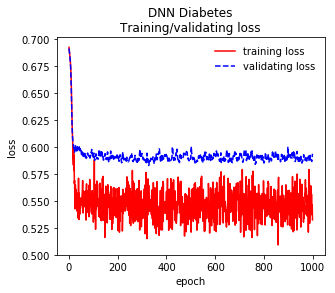

In [17]:
#----------------------------------------
# Summarize history for loss.

plt.figure('DNN Diabetes loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Diabetes' + '\n' + 'Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
plt.show()


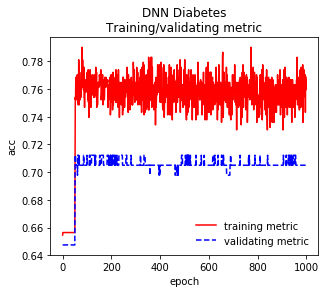

In [18]:
#----------------------------------------
# Summarize history for metric.

plt.figure('DNN Diabetes metric', figsize = (4.8, 4.0))
plt.plot(history.history['acc'], "r-")
plt.plot(history.history['val_acc'], "b--")
plt.title('DNN Diabetes' + '\n' + 'Training/validating metric')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
plt.show()